In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import pickle as pk
import seaborn as sns

In [236]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('breast cancer data.csv')

# Display the first few rows of the dataset
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

**Data Preprocessing**

In [237]:
# Count the number of missing values in each column
missing_values_count = data.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values:")
print(missing_values_count)

Number of missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimen

In [238]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [239]:
# extract information from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [240]:
# Delete the patient ID column and also the delete the column with no information
data = data.drop(['id', 'Unnamed: 32'], axis=1)
data.head()



diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

**feature engineering**
This code uses scikit-learn's LabelEncoder to convert categorical cancer diagnosis labels ('Malignant' and 'Benign') into numerical values (1 and 0), then displays the updated DataFrame.

In [241]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Print the encoded DataFrame
print("Label encoded DataFrame:")
data.head()

Label encoded DataFrame:


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

This code uses scikit-learn's StandardScaler to standardize the numeric features in the DataFrame, excluding the 'diagnosis' column. It then prints the scaled DataFrame.






In [242]:
from sklearn.preprocessing import StandardScaler

# Extract the numeric columns to scale
# Select numeric features excluding the 'diagnosis' column
numeric_columns = data.select_dtypes(include=np.number).columns.drop('diagnosis')


# Perform scaling
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Print the scaled DataFrame
print("Scaled DataFrame:")
data.head()

Scaled DataFrame:


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.359293         2.303601   
1       0.001392  ...      1.805927      -0.369203         1.535126   
2       0.939685  ...      1.511870      -0.023974         1.347475   
3       2.867383  ...     -0.281464       0.133984        -0.249939   
4      -0.009560  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 31 columns]

In [243]:
data['diagnosis'].unique()

array([1, 0])

This code separates features into three groups based on their column names (mean, s.e., and worst) using list comprehension. Then, it prints the extracted feature columns for each group.

In [244]:
# Extract the mean features using list comprehension
mean_features = data[[col for col in data.columns if 'mean' in col]]

# Extract the s.e. (standard error) features using list comprehension
se_features = data[[col for col in data.columns if 'se' in col]]

# Extract the worst features using list comprehension
worst_features = data[[col for col in data.columns if 'worst' in col]]

# Print the extracted features
print("Mean Features:")
print(mean_features.columns)

print("\nS.E. Features:")
print(se_features.columns)

print("\nWorst Features:")
print(worst_features.columns)

Mean Features:
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

S.E. Features:
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

Worst Features:
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


This code defines a function generate_normal_distribution_plots that uses Seaborn to create normal distribution plots for selected features in the dataset. It arranges subplots based on the number of features and displays histograms with KDE for each feature and diagnosis class.

In [245]:
def generate_normal_distribution_plots(data, features):
    # Set the figure size
    plt.figure(figsize=(20, 16))

    # Calculate the number of subplots based on the number of features
    num_plots = len(features)

    # Adjust the subplot layout dynamically based on the number of plots
    cols = 3
    rows = (num_plots - 1) // cols + 1

    # Iterate over each feature
    for i, feature in enumerate(features):
        # Create a normal distribution plot
        plt.subplot(rows, cols, i + 1)
        sns.histplot(data=data, x=feature, hue='diagnosis', kde=True)
        plt.title("Normal Distribution Plot - {}".format(feature), fontsize=20)
        plt.xlabel("Value", fontsize=20)
        plt.ylabel("Density", fontsize=20)

    # Adjust subplot spacing
    plt.tight_layout()

    # Show the plot
    plt.show()






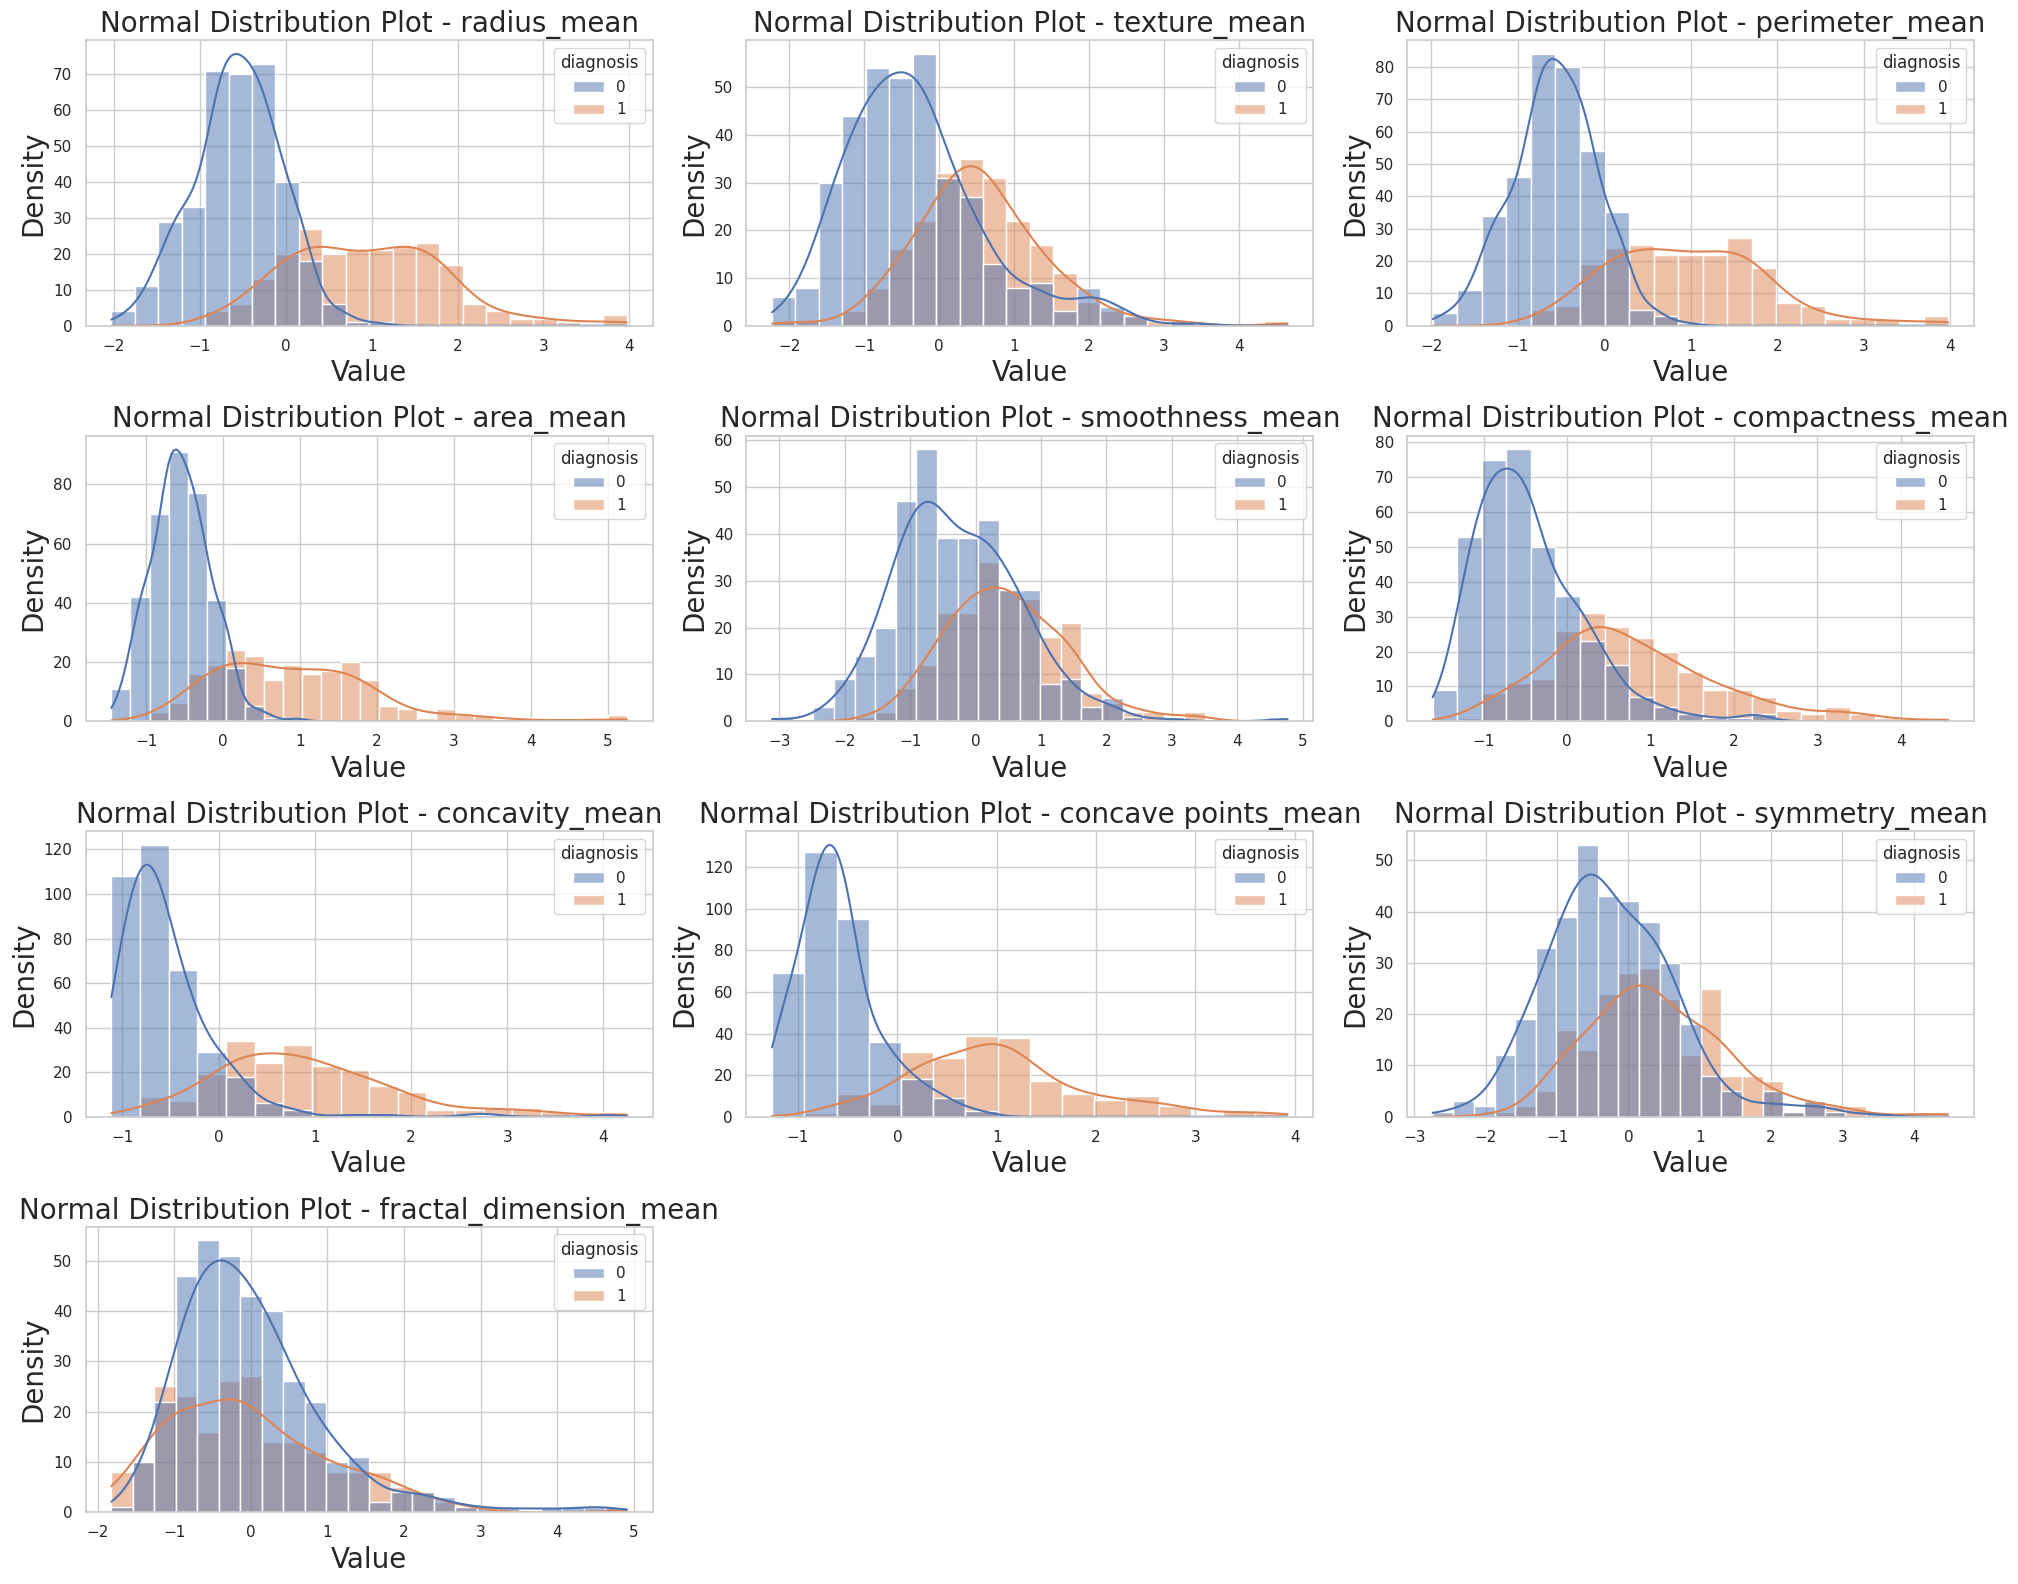

In [246]:
# Call the generate_normal_distribution_plots() function for mean features
generate_normal_distribution_plots(data, mean_features.columns)


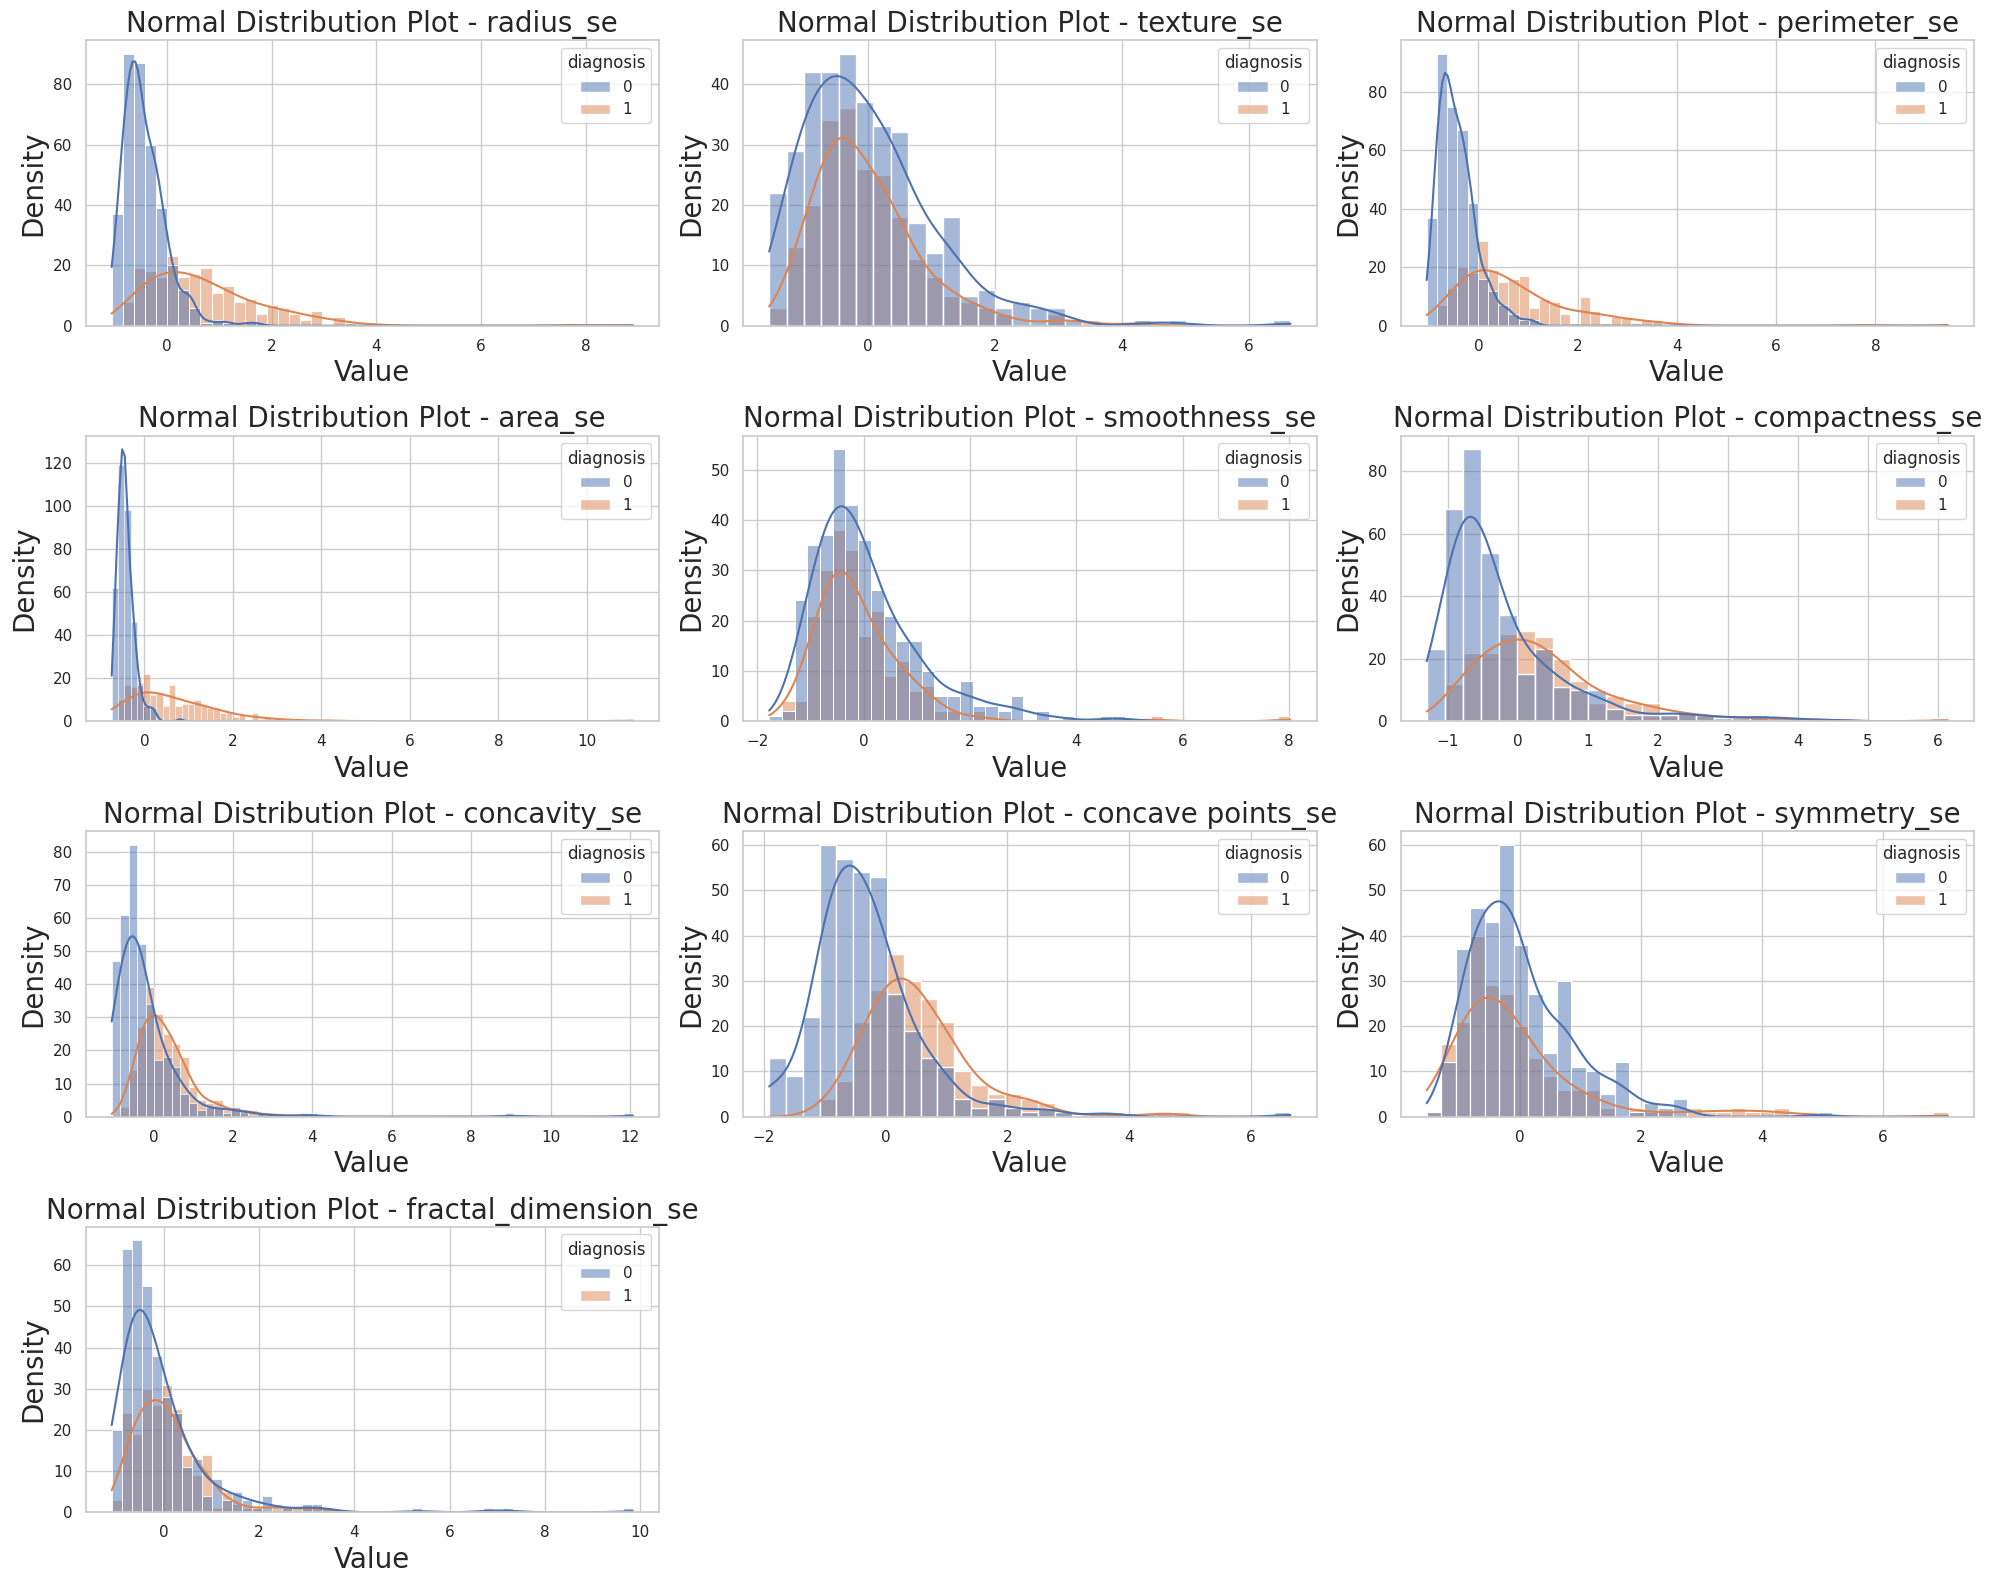

In [247]:
# Call the generate_normal_distribution_plots() function for standard error features
generate_normal_distribution_plots(data, se_features.columns)


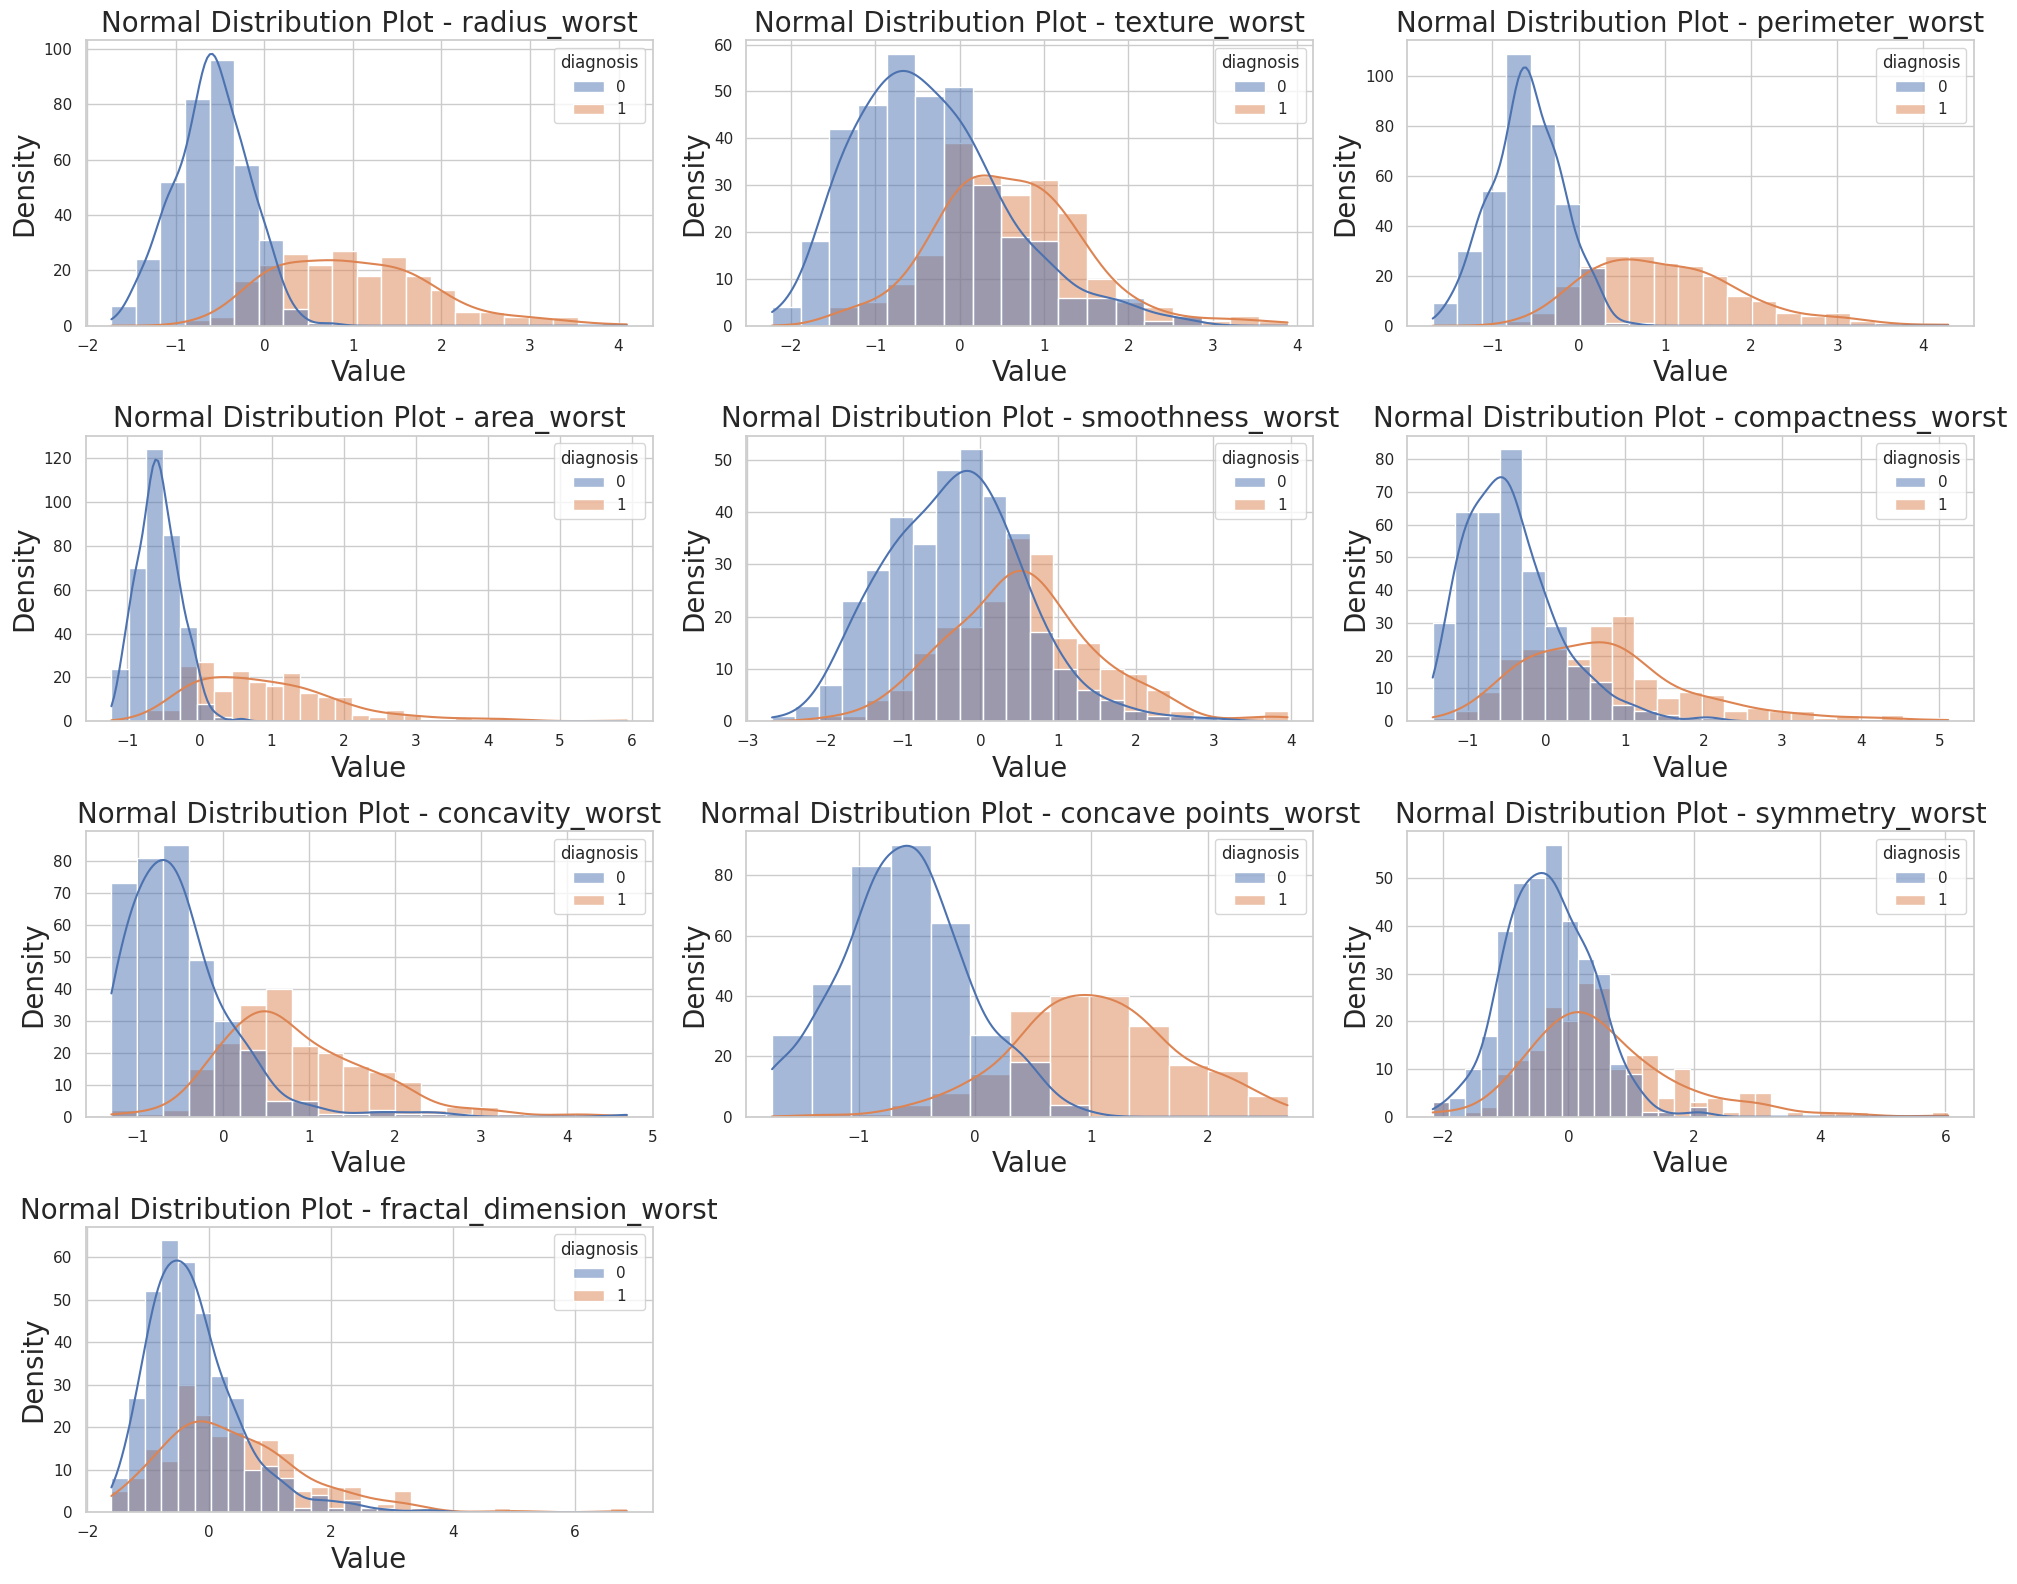

In [248]:
# Call the generate_normal_distribution_plots() function for standard error features
generate_normal_distribution_plots(data, worst_features.columns)

This function generate_box_plots creates box plots for selected features in the dataset, grouped by diagnosis class. It dynamically arranges subplots and displays feature distributions for each diagnosis class using Seaborn's boxplot function.






In [249]:
def generate_box_plots(data, features):
    # Set the figure size
    plt.figure(figsize=(20, 16))

    # Set the global font size for the plot
    plt.rc('font', size=15)


    # Calculate the number of subplots based on the number of features
    num_plots = len(features)

    # Adjust the subplot layout dynamically based on the number of plots
    cols = 3
    rows = (num_plots - 1) // cols + 1

    # Iterate over each feature
    for i, feature in enumerate(features):
        # Create a box plot
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(data=data, x='diagnosis', y=feature)
        plt.title("Box Plot - {}".format(feature), fontsize=25)
        plt.xlabel("Diagnosis", fontsize=20)
        plt.ylabel("Value", fontsize=20)

    # Adjust subplot spacing
    plt.tight_layout()

    # Show the plot
    plt.show()





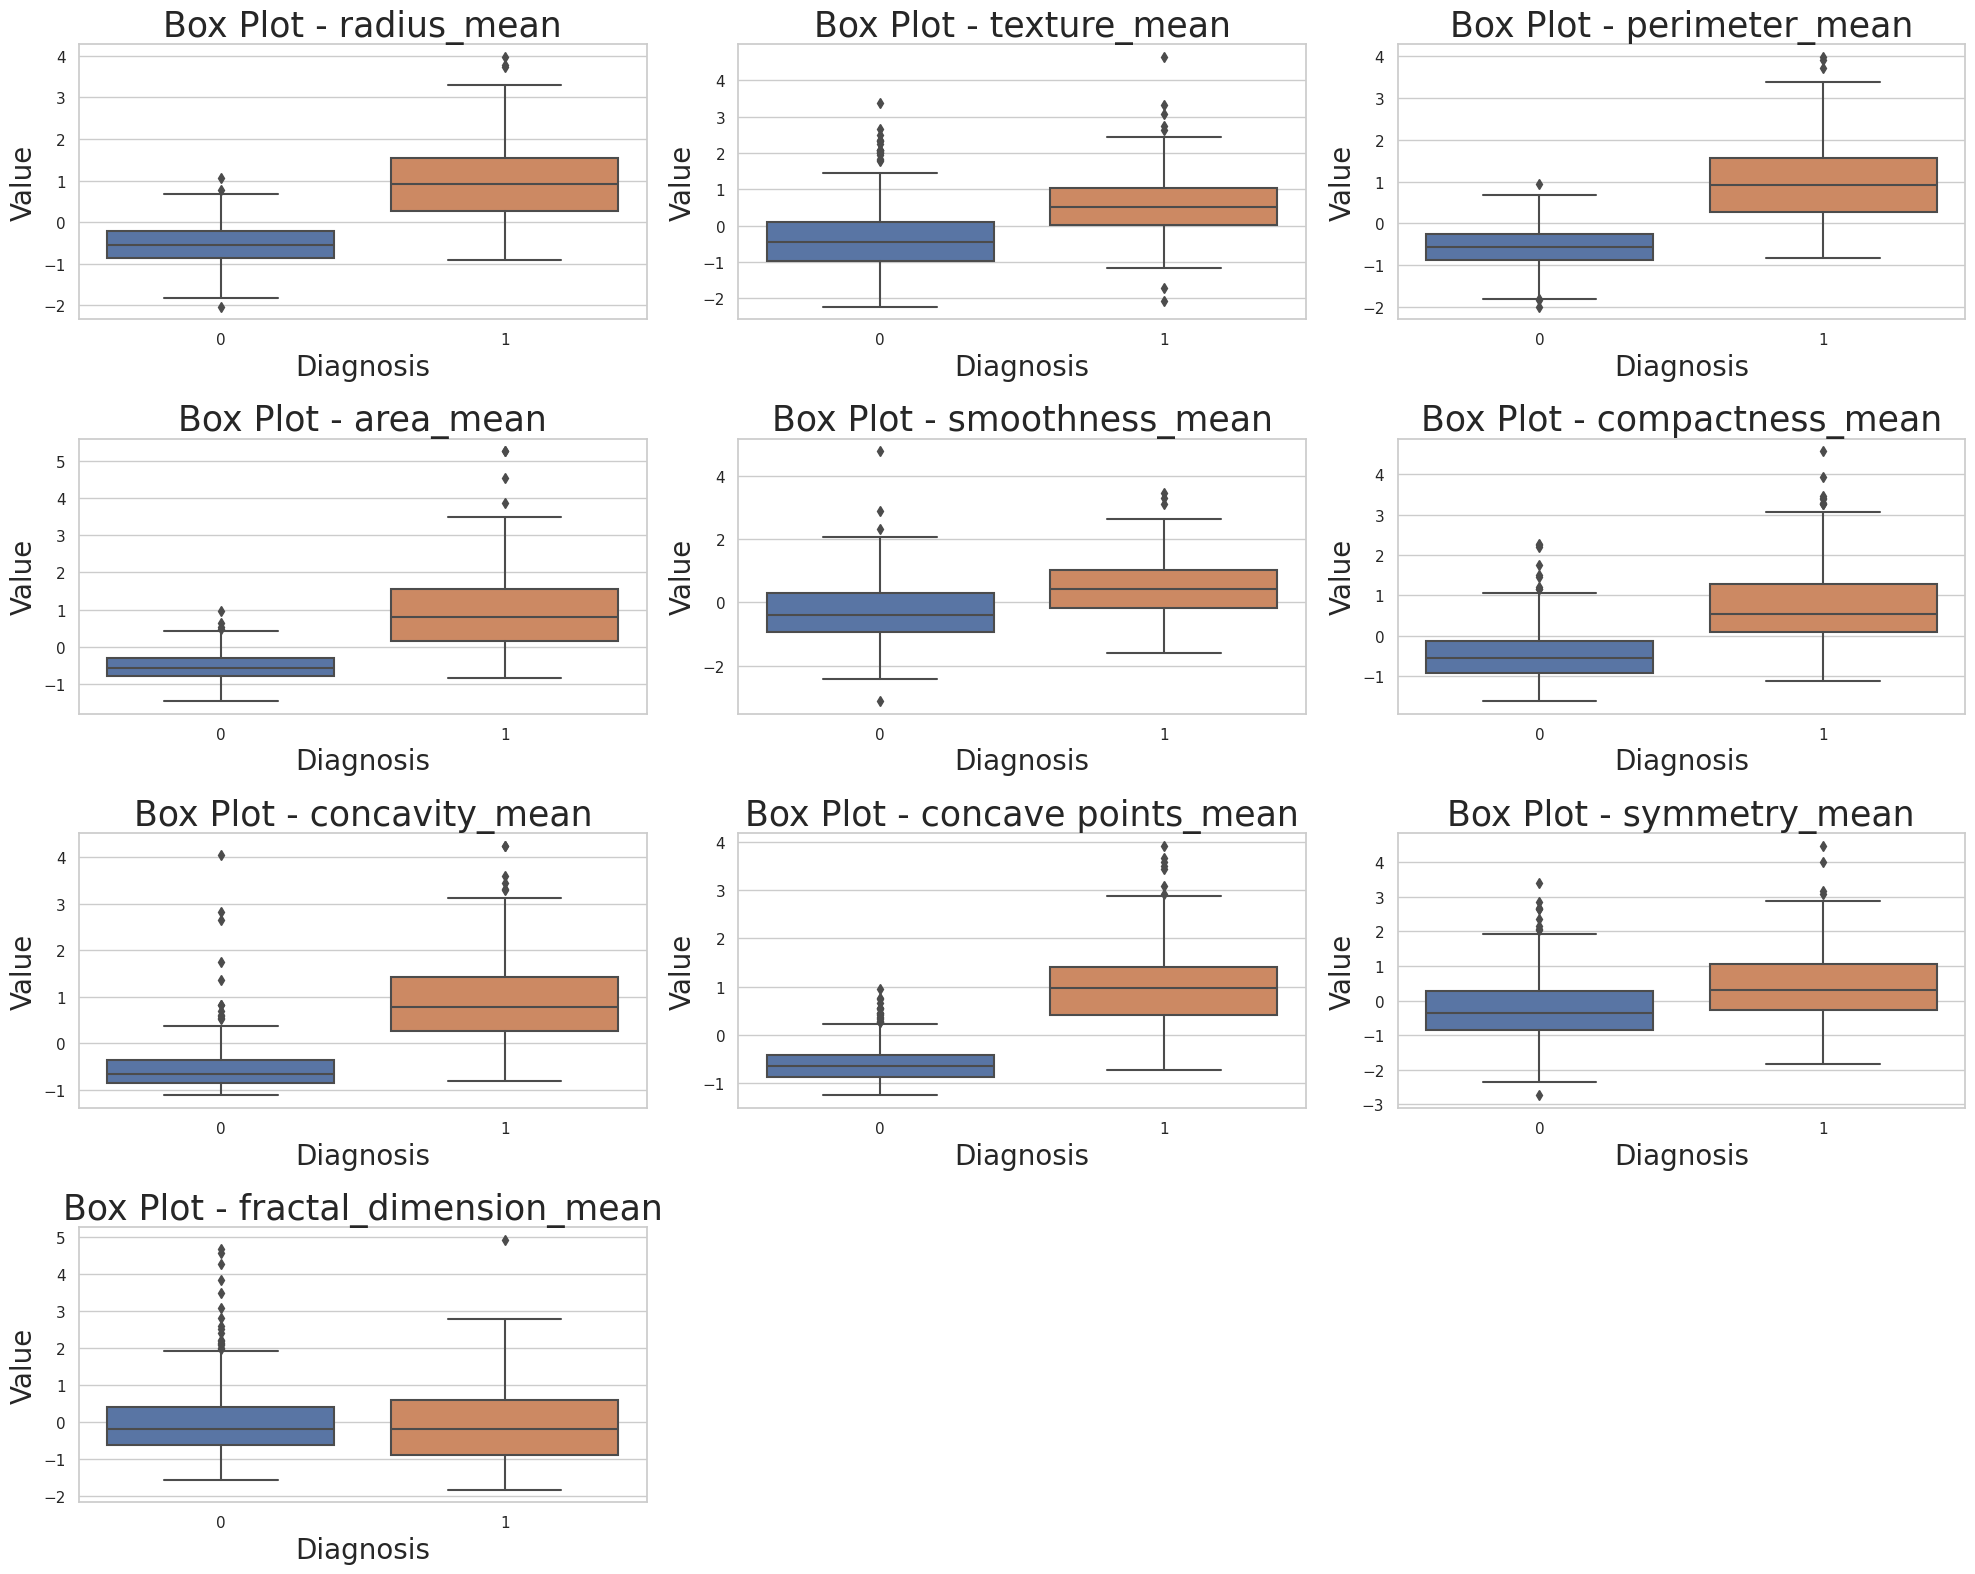

In [250]:
# Call the generate_box_plots() function for mean features
generate_box_plots(data, mean_features.columns)

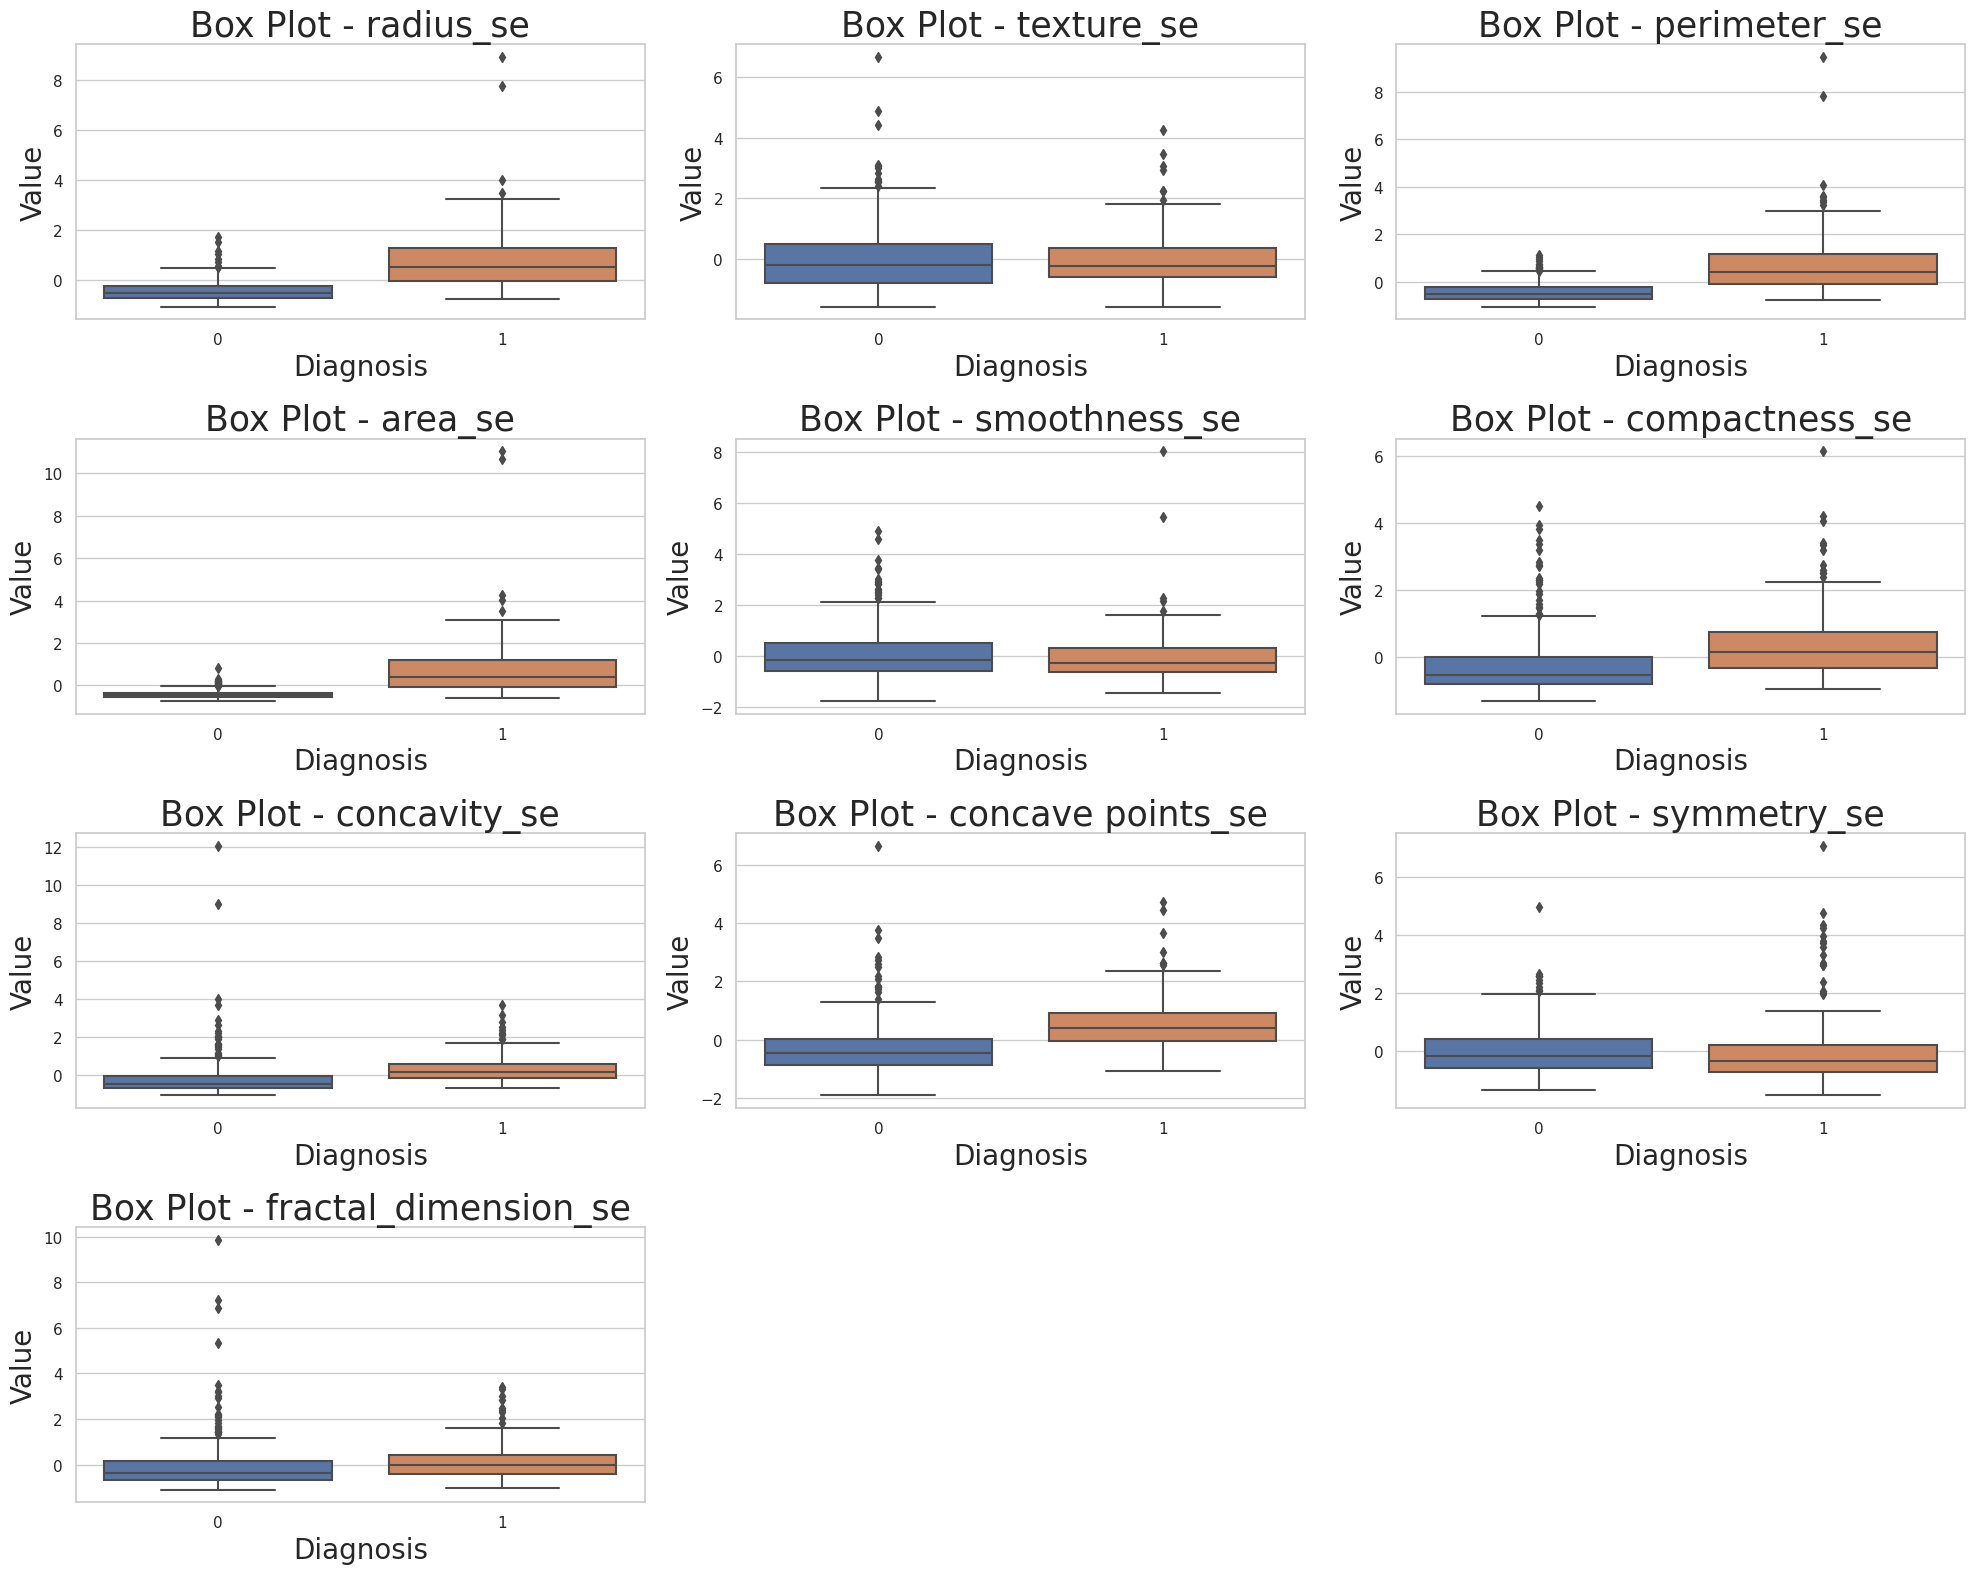

In [251]:
# Call the generate_normal_distribution_plots() function for standard error features
generate_box_plots(data, se_features.columns)

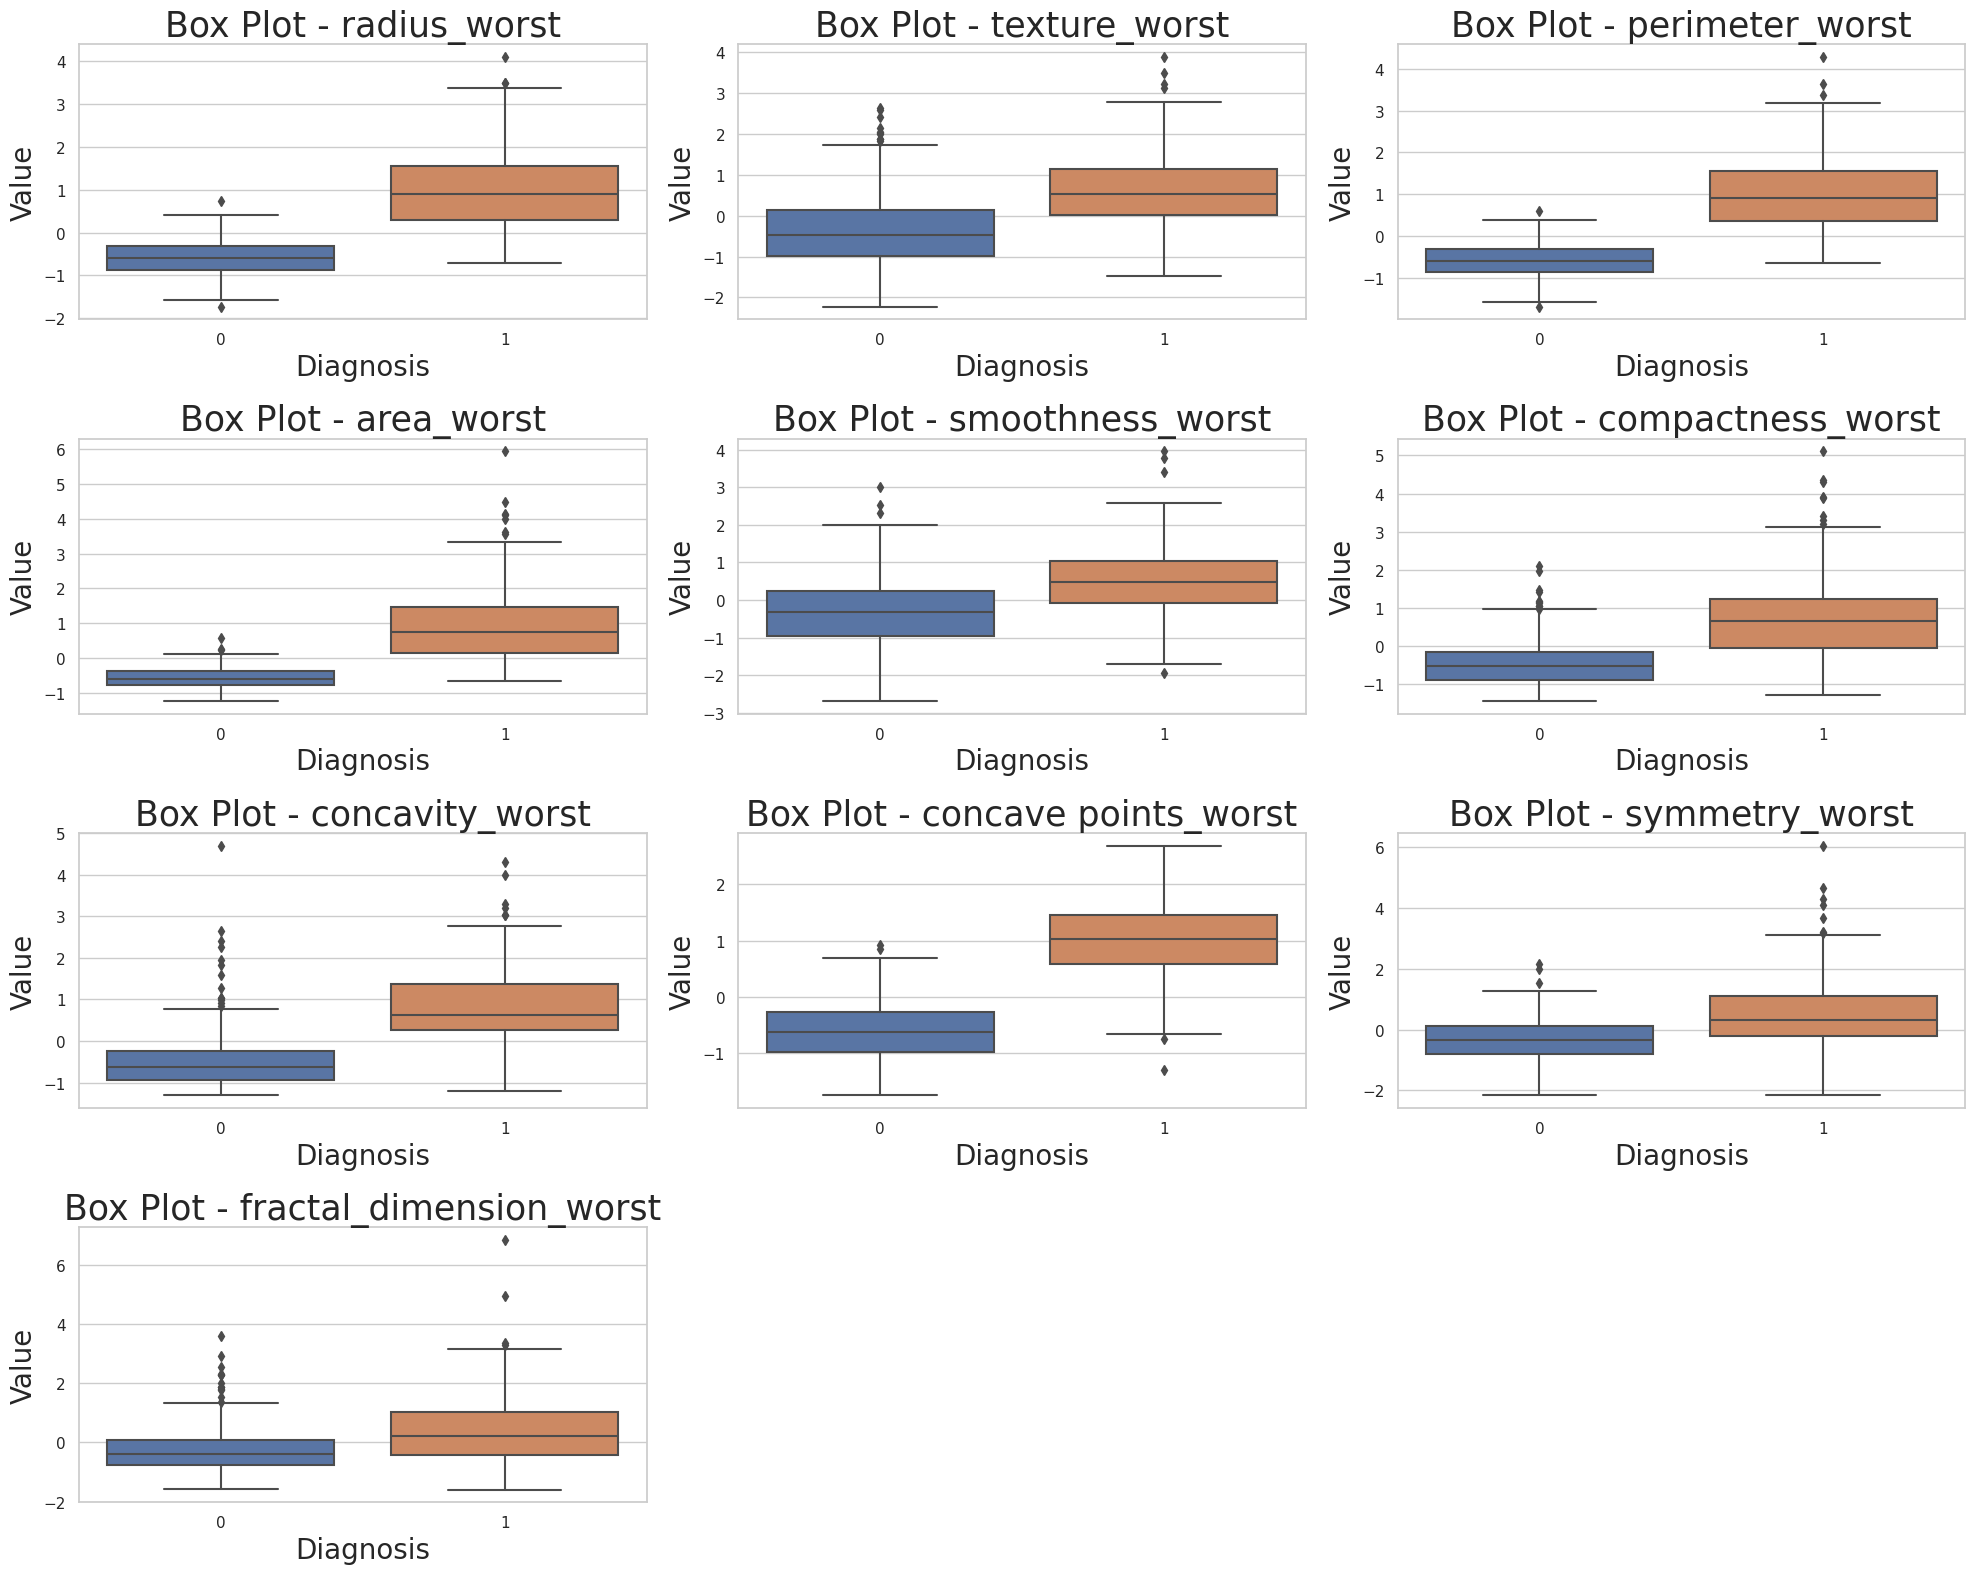

In [252]:
# Call the generate_normal_distribution_plots() function for standard error features
generate_box_plots(data, worst_features.columns)

 The function below utilizes Z-scores to identify and collect outlier values for each feature in a DataFrame. It's useful for detecting data points that significantly deviate from the mean.

In [253]:
def detect_outliers_zscore(df, threshold=3):
    # Compute the Z-score for each feature
    zscores = (data - data.mean()) / data.std()

    # Create an empty DataFrame to store the outlier values
    outliers = pd.DataFrame(columns=data.columns)

    # Iterate over each feature
    for col in data.columns:
        # Find the outliers based on the Z-score threshold
        feature_outliers = zscores[col].abs() > threshold

        # Get the outlier values for the feature
        feature_values = data[col].loc[feature_outliers]

        # Store the outlier values in the DataFrame
        outliers[col] = feature_values

    return outliers
detect_outliers_zscore(data, threshold=3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
82         NaN     3.150487           NaN        3.275896   3.478653   
180        NaN     3.718515           NaN        3.712513   4.536659   
212        NaN     3.971288           NaN        3.976130   5.244841   
352        NaN     3.295334           NaN        3.387110   3.854074   
461        NaN     3.775318           NaN        3.910226   5.250529   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
82               NaN          3.073153        3.077232             3.497170   
180              NaN               NaN             NaN             3.582290   
212              NaN               NaN             NaN                  NaN   
352              NaN               NaN        3.113641             3.672569   
461              NaN               NaN        3.448859             3.094784   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
82             NaN  ...           NaN            NaN         3.110797   
180            NaN  ...      3.489508            NaN         3.381848   
212            NaN  ...           NaN            NaN              NaN   
352            NaN  ...      3.491579            NaN         3.635028   
461            NaN  ...      4.094189            NaN         4.287337   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
82          NaN               NaN                NaN              NaN   
180    4.105459               NaN                NaN              NaN   
212         NaN               NaN                NaN              NaN   
352    4.137101               NaN                NaN              NaN   
461    5.930172               NaN                NaN              NaN   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
82                    NaN             NaN                      NaN  
180                   NaN             NaN                      NaN  
212                   NaN             NaN                      NaN  
352                   NaN             NaN                      NaN  
461                   NaN             NaN                      NaN  

[5 rows x 31 columns]

Detecting Outliers using interquartile range.

The code defines a function detect_outliers_iqr to find outliers in a DataFrame using the IQR method. It calculates quartiles and sets bounds for outlier detection. Outliers are identified if they fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. The function returns a DataFrame with outlier values for each feature.

In [254]:
def detect_outliers_iqr(df):
    # Calculate the IQR for each feature
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Create an empty DataFrame to store the outlier values
    outliers = pd.DataFrame(columns=df.columns)

    # Iterate over each feature
    for col in df.columns:
        # Find the outliers based on the lower and upper bounds
        feature_outliers = (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])

        # Get the outlier values for the feature
        feature_values = df[col].loc[feature_outliers]

        # Store the outlier values in the DataFrame
        outliers[col] = feature_values

    return outliers

# Call the function to detect outliers using IQR method
detect_outliers_iqr(data)



diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
82         NaN     3.150487           NaN        3.275896   3.478653   
108        NaN     2.312645           NaN        2.505640   2.429179   
122        NaN     2.874993           NaN        3.057588   3.145893   
164        NaN     2.596659           NaN        2.476807   2.932585   
180        NaN     3.718515           NaN        3.712513   4.536659   
202        NaN     2.602339           NaN        2.756900   2.929741   
212        NaN     3.971288           NaN        3.976130   5.244841   
236        NaN     2.579618           NaN        2.534473   2.887080   
339        NaN     2.664822           NaN        2.600377   3.106075   
352        NaN     3.295334           NaN        3.387110   3.854074   
369        NaN     2.238801           NaN             NaN   2.352388   
461        NaN     3.775318           NaN        3.910226   5.250529   
503        NaN     2.545536           NaN        2.476807   2.921209   
521        NaN     2.982918           NaN        3.028755   3.373421   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
82               NaN          3.073153        3.077232             3.497170   
108              NaN          3.268353        4.238567             3.440423   
122         3.440117          3.455973        4.243589             3.927930   
164              NaN               NaN             NaN                  NaN   
180              NaN               NaN        2.489659             3.582290   
202              NaN               NaN        3.308243             2.916806   
212              NaN               NaN        2.903973             2.852321   
236              NaN               NaN             NaN                  NaN   
339              NaN               NaN             NaN                  NaN   
352              NaN          2.500819        3.113641             3.672569   
369              NaN               NaN             NaN                  NaN   
461              NaN               NaN        3.448859             3.094784   
503              NaN               NaN             NaN                  NaN   
521              NaN               NaN             NaN                  NaN   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
82             NaN  ...      2.843411            NaN         3.110797   
108       2.717694  ...      2.512079            NaN         2.964846   
122       3.079138  ...           NaN            NaN              NaN   
164            NaN  ...      2.431317            NaN              NaN   
180            NaN  ...      3.489508            NaN         3.381848   
202            NaN  ...           NaN            NaN              NaN   
212            NaN  ...      2.452025            NaN         2.419765   
236            NaN  ...      3.052564            NaN         2.941018   
339            NaN  ...      2.982156            NaN         2.833789   
352            NaN  ...      3.491579            NaN         3.635028   
369            NaN  ...      2.358838            NaN         2.613373   
461            NaN  ...      4.094189            NaN         4.287337   
503            NaN  ...      3.007006            NaN         3.104840   
521            NaN  ...      2.826844            NaN         2.932082   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
82     2.955784               NaN                NaN              NaN   
108    2.600686               NaN           2.833589         3.303630   
122    2.096165               NaN                NaN              NaN   
164    2.676276               NaN                NaN              NaN   
180    4.105459               NaN                NaN              NaN   
202    1.943226               NaN                NaN         2.480375   
212    2.845036               NaN                NaN              NaN   
236    3.627307               NaN                NaN      

The IQR method defines outliers based on the range between the first and third quartiles of the data. It is robust to outliers and resistant to extreme values, but it may not capture some extreme values that fall within the defined bounds.

On the other hand, the Z-score method standardizes the data using the mean and standard deviation. It identifies outliers as values with Z-scores greater than or less than a threshold. The Z-score method assumes a normal distribution and is sensitive to extreme values, potentially classifying slightly deviant values as outliers if they significantly affect the mean and standard deviation.

The output of IQR method is a superset of Z score method. Therefore, IQR is more robust to outliers and resistant to extreme value.

 Remove outliers from the dataset using the interquartile range (IQR) method.

In [255]:
def remove_outliers_iqr(df):
    # Calculate the IQR for each feature
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Iterate over each feature
    for col in df.columns:
        # Filter out the outliers based on the lower and upper bounds
        df = df.loc[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]

    return df

# Call the function to remove outliers using IQR method
filtered_data = remove_outliers_iqr(data)


In [256]:
filtered_data.shape

(398, 31)

Count the occurrences of each Diagnosis class

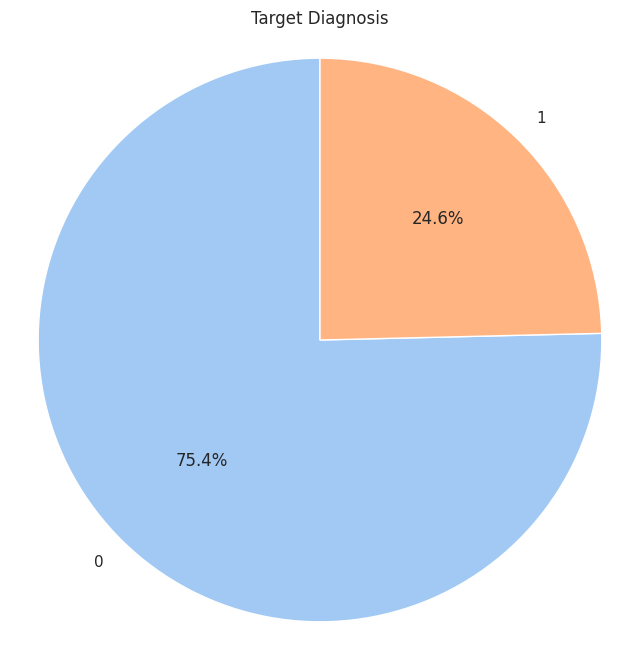

In [257]:
# Count the occurrences of each Diagnosis class
diagnosis_counts = filtered_data['diagnosis'].value_counts()

# Get the class labels and count values
labels = diagnosis_counts.index
counts = diagnosis_counts.values

# Set up the pie chart using seaborn
plt.figure(figsize=(8, 8))
sns.set(style='whitegrid')
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Set the title and aspect ratio
plt.title('Target Diagnosis')
plt.axis('equal')

# Show the plot
plt.show()


This code calculates the correlation matrix for a filtered dataset and displays it as a heatmap using Seaborn. The heatmap shows feature correlations, aiding in understanding relationships between features.



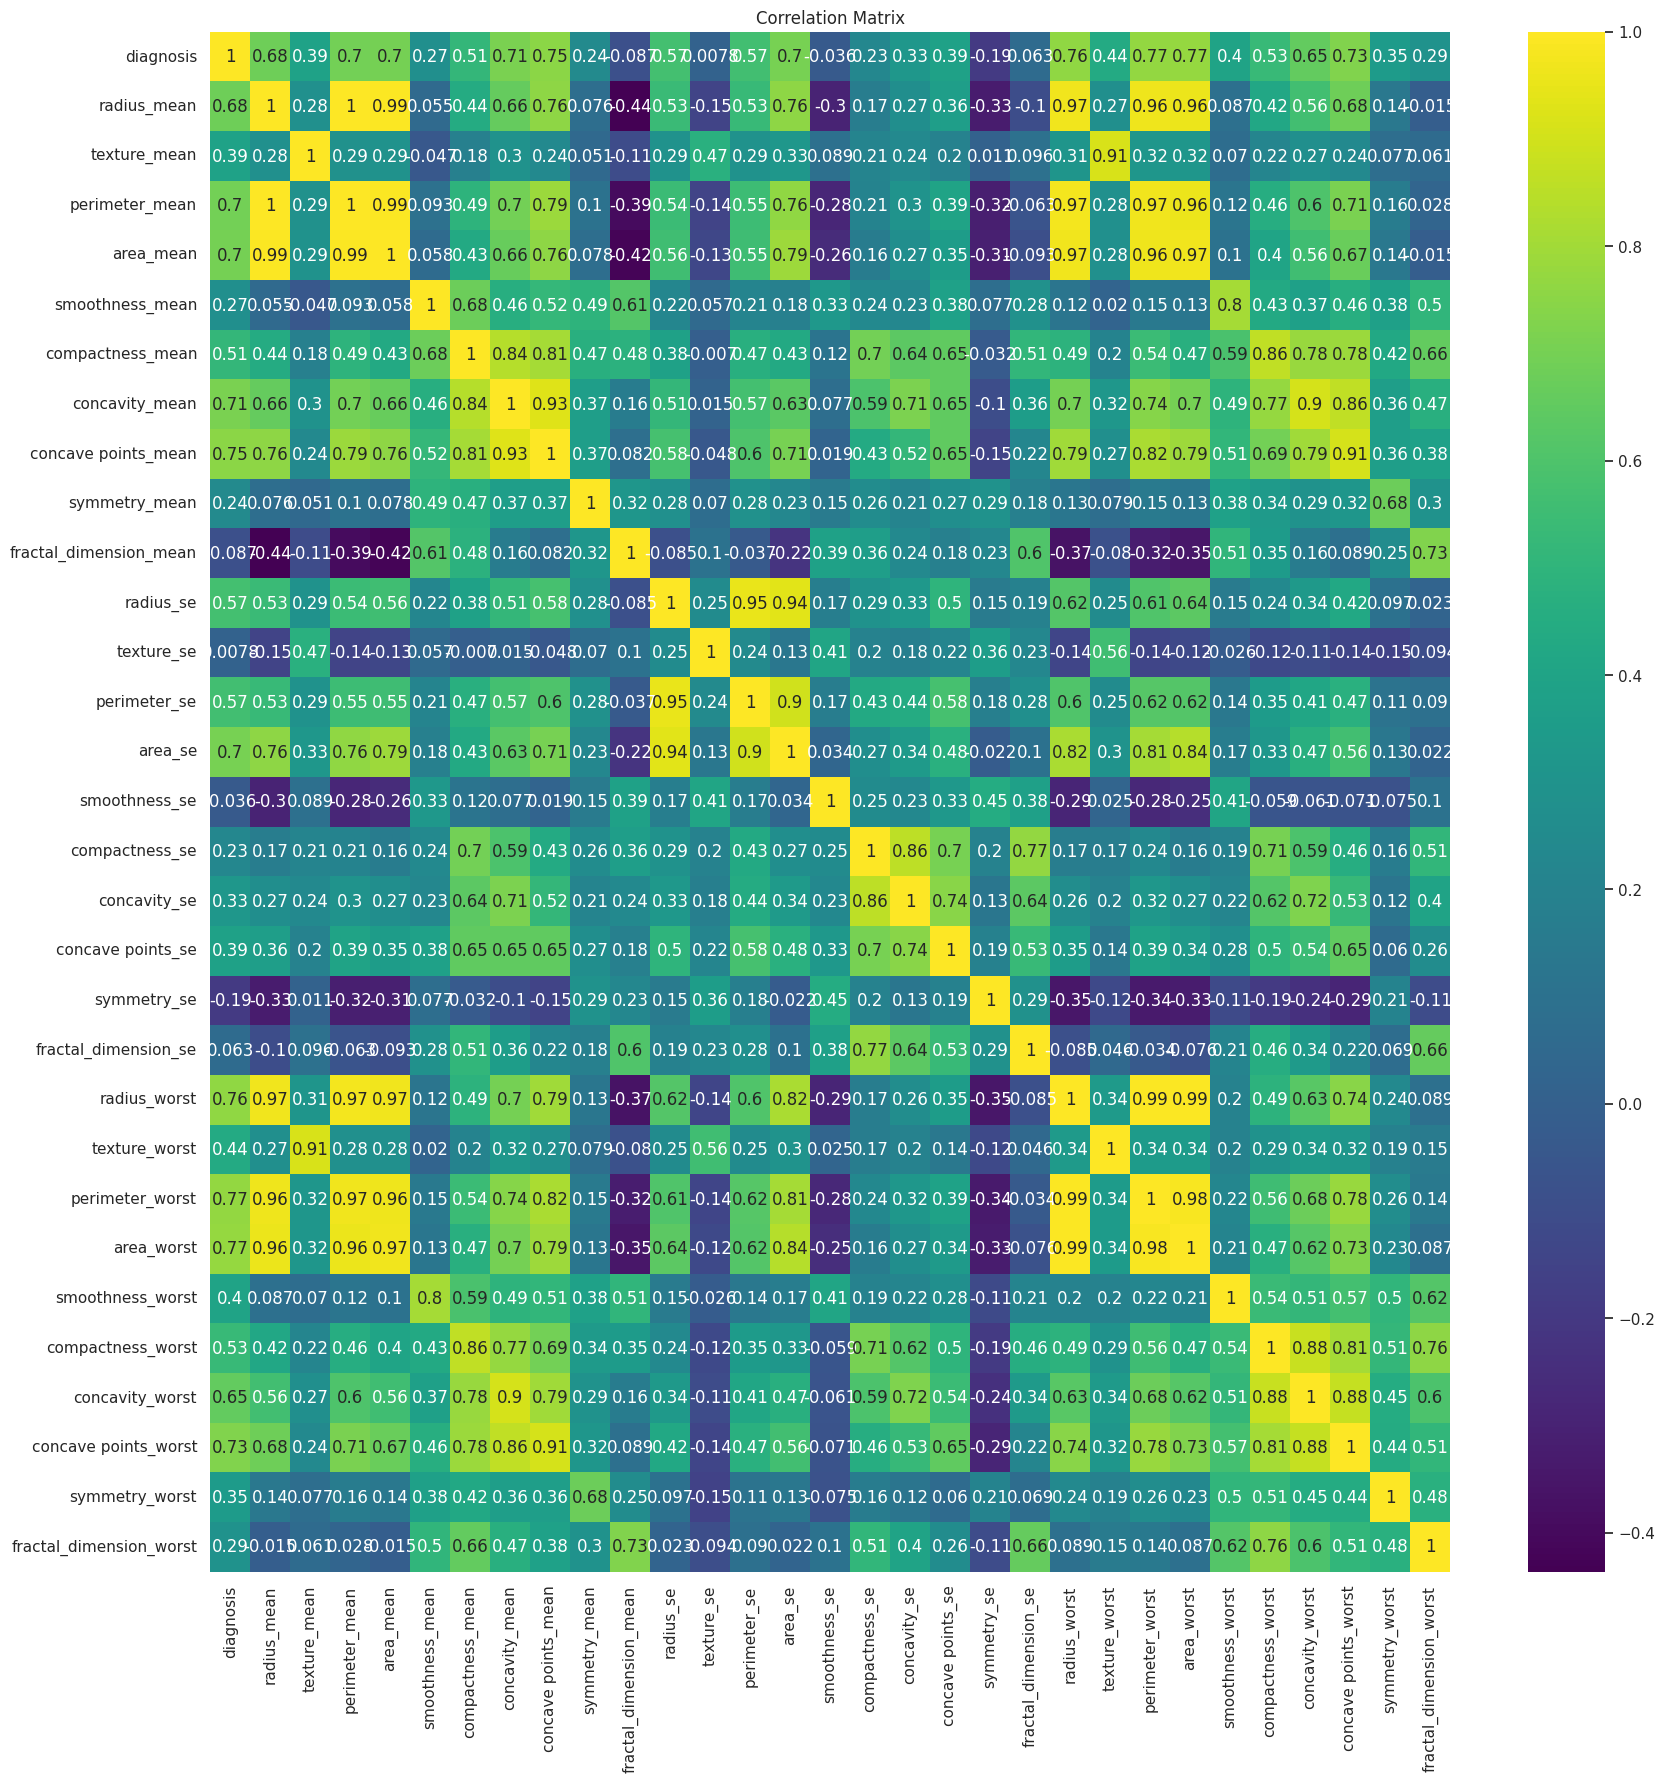

In [258]:
# Calculate the correlation matrix
corr_matrix_ = filtered_data.corr()

# Set up the figure size
plt.figure(figsize=(20, 20))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix_, annot=True, cmap='viridis')

# Set the title and display the plot
plt.title('Correlation Matrix')
plt.show()

The code defines a function correlated_features to identify features with high and low correlations setting the  threshold to 0.9

In [259]:
def correlated_features(threshold):
    # Initialize empty sets for highly correlated and low correlated features
    highly_correlated_features = set()
    low_correlated_features = set()

    # Iterate over the correlation matrix
    for i in range(len(corr_matrix_.columns)):
        for j in range(i):
            correlation_value = corr_matrix_.iloc[i, j]

            if abs(correlation_value) > threshold:
                # If the correlation exceeds the threshold, add the feature names to the highly correlated set
                colname = corr_matrix_.columns[i]
                highly_correlated_features.add(colname)
            else:
                # If the correlation is below the threshold, add the feature names to the low correlated set
                colname = corr_matrix_.columns[i]
                low_correlated_features.add(colname)

    # Print the highly correlated features
    print("Highly correlated features:")
    for feature in highly_correlated_features:
        print(feature)
    print('')
    # Print the low correlated features
    print("Low correlated features:")
    for feature in corr_matrix_.columns:
        if feature not in highly_correlated_features:
            print(feature)


# Find highly correlated and low correlated features
threshold = 0.9  # Define the correlation threshold
correlated_features(threshold)


Highly correlated features:
concavity_worst
area_mean
radius_worst
texture_worst
concave points_mean
perimeter_worst
perimeter_se
concave points_worst
perimeter_mean
area_se
area_worst

Low correlated features:
diagnosis
radius_mean
texture_mean
smoothness_mean
compactness_mean
concavity_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
smoothness_worst
compactness_worst
symmetry_worst
fractal_dimension_worst


This plots visually presents relationships between these features and diagnoses, aiding in understanding their associations.

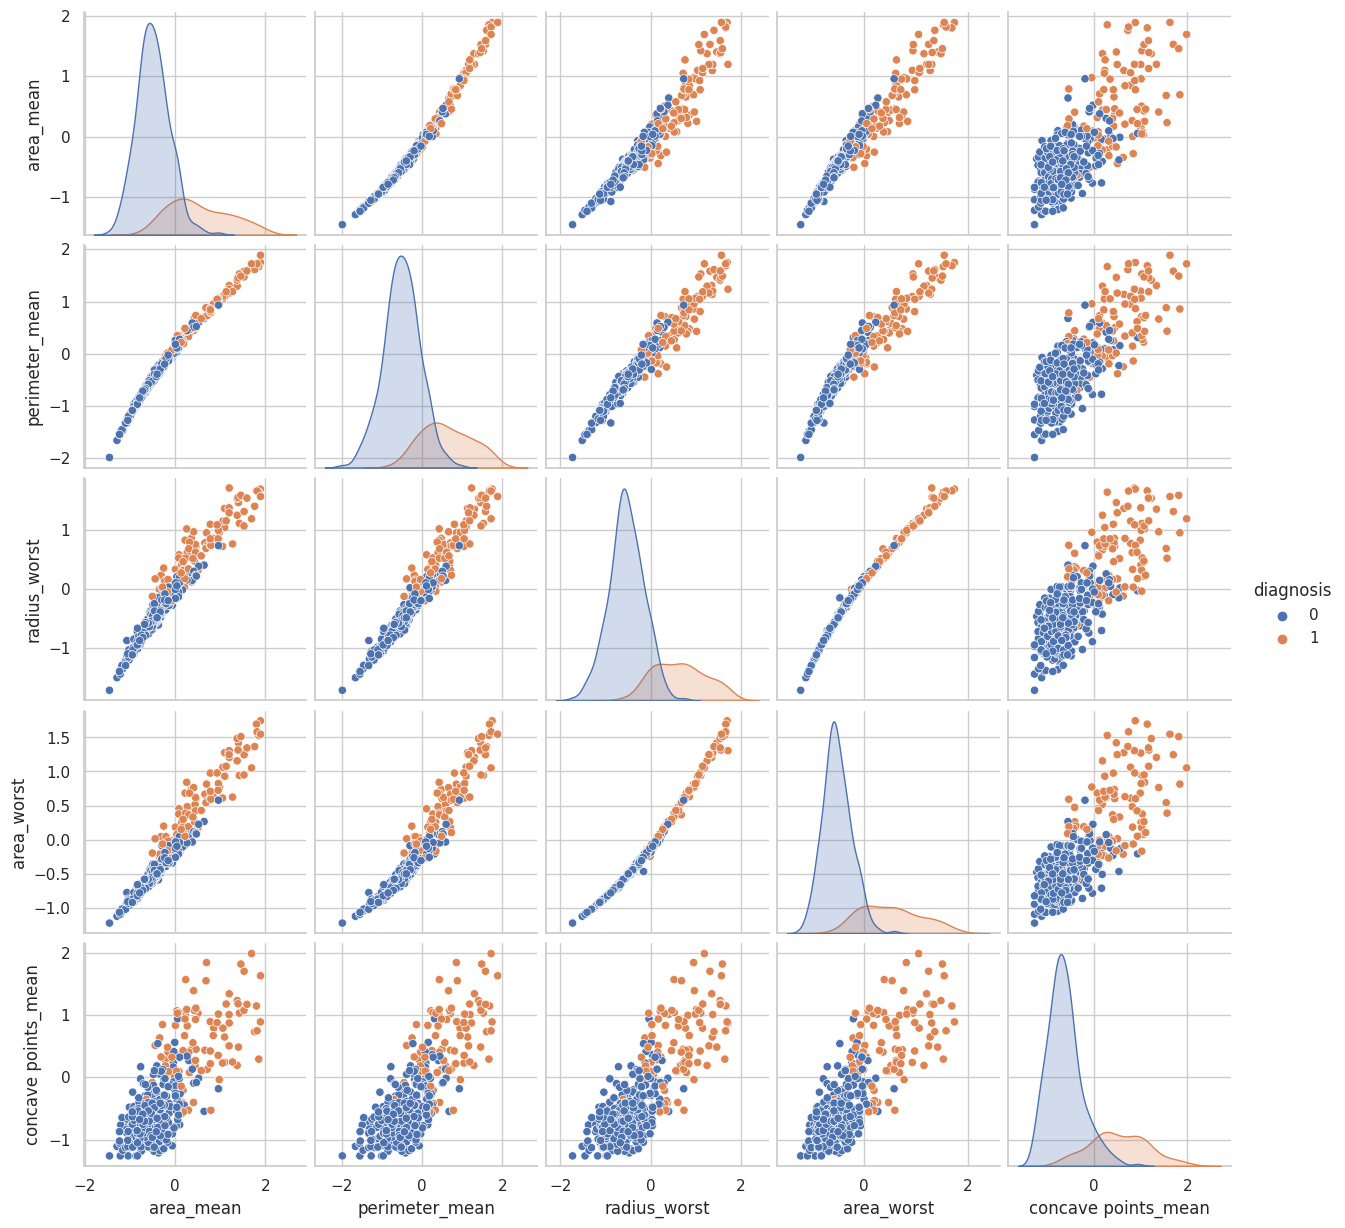

In [260]:
high_corr_features = ['area_mean', 'perimeter_mean', 'radius_worst', 'area_worst', 'concave points_mean']

# Create a subset of the data with only the highly correlated features and the 'diagnosis' column
subset_data = filtered_data[high_corr_features + ['diagnosis']]

# Create a pair plot
sns.pairplot(subset_data, hue='diagnosis')

# Display the plot
plt.show()

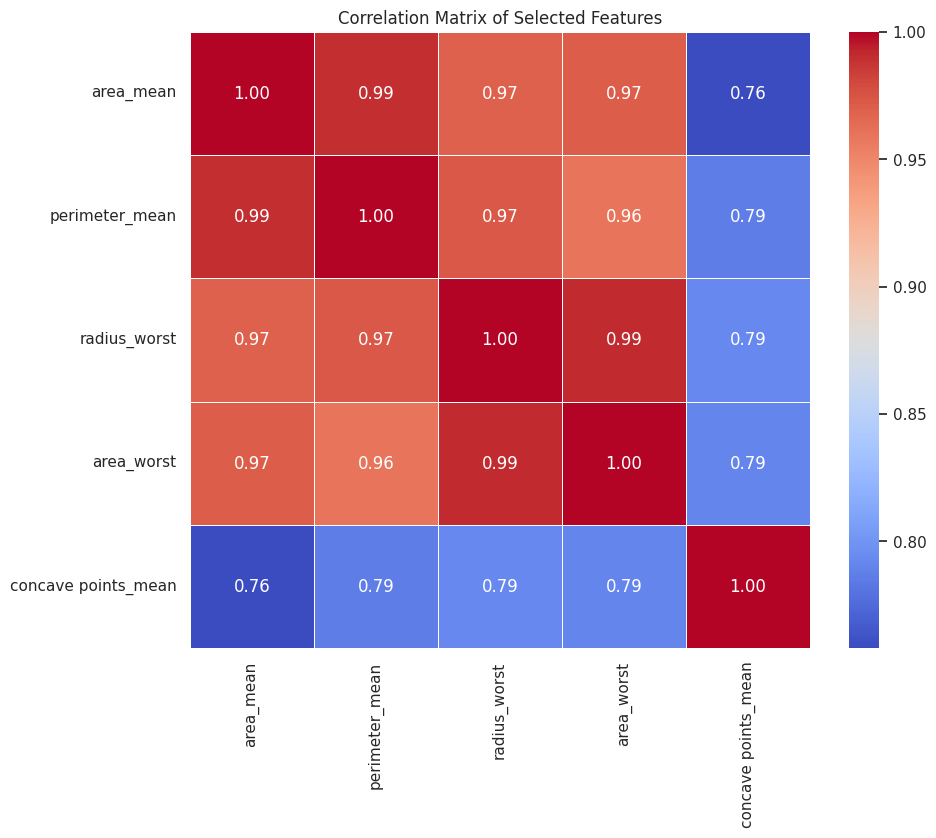

In [261]:
high_corr_features = ['area_mean', 'perimeter_mean', 'radius_worst', 'area_worst', 'concave points_mean']

# Create a subset of the data with only the highly correlated features
subset_data = filtered_data[high_corr_features]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set plot title
plt.title('Correlation Matrix of Selected Features')

# Display the plot
plt.show()



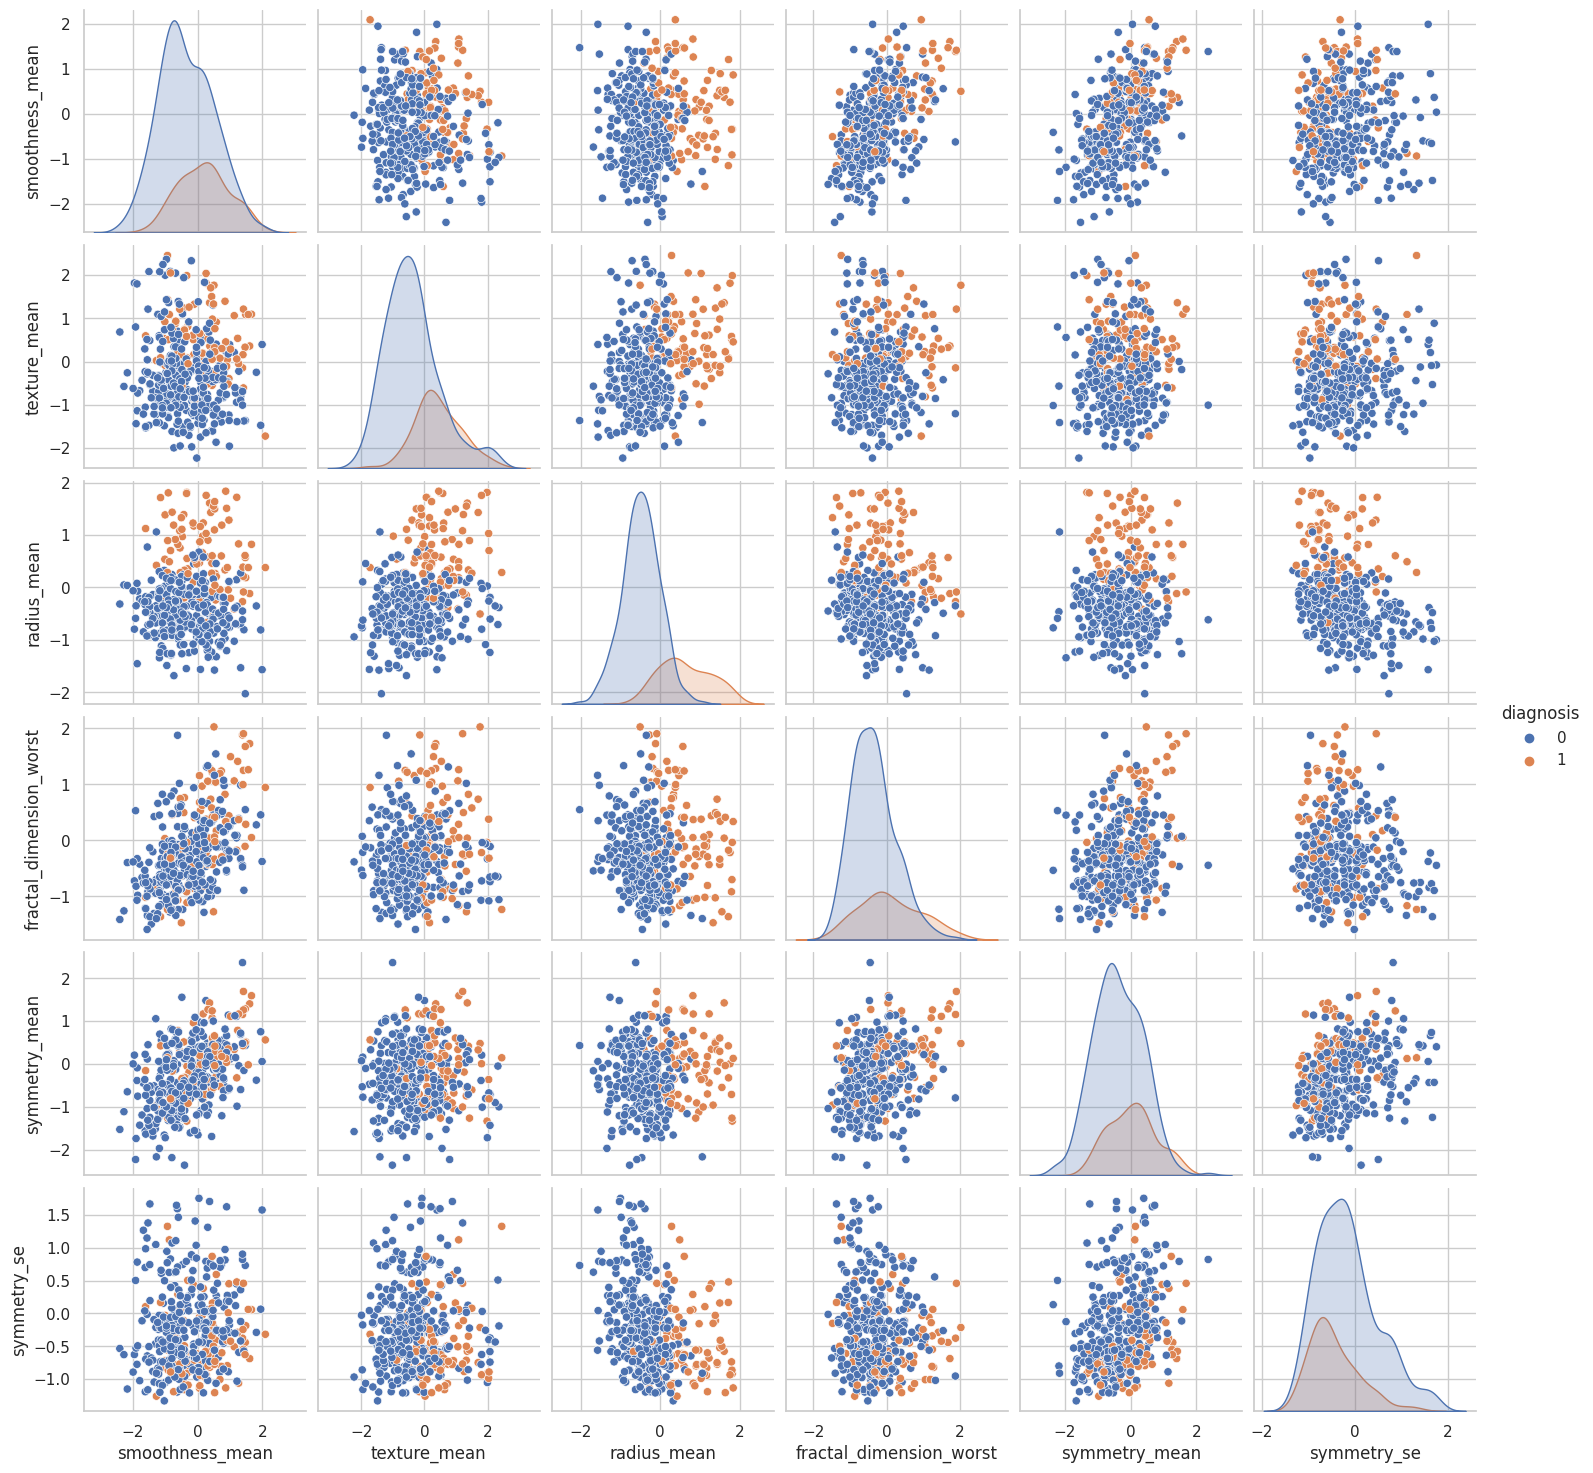

In [262]:
uncorr_features = ['smoothness_mean', 'texture_mean', 'radius_mean', 'fractal_dimension_worst', 'symmetry_mean', 'symmetry_se']

# Create a subset of the data with only the  uncorrelated features and the 'diagnosis' column
subset_data = filtered_data[uncorr_features + ['diagnosis']]

# Create a pair plot
sns.pairplot(subset_data, hue='diagnosis')

# Display the plot
plt.show()

**FEATURE SELECTION**
Evaluate and compare different feature selection methods to identify the most informative features such as  using
1. The Filter method(checking for multicollinearity and variance inflation factor)
2. forward feature select method using SVM
3. forward feature select method using Random forest
4. Dimensional Reduction method(principal component analysis)



 calculates and displays a heatmap of the correlation matrix among predictor variables, helping visualize their relationships.



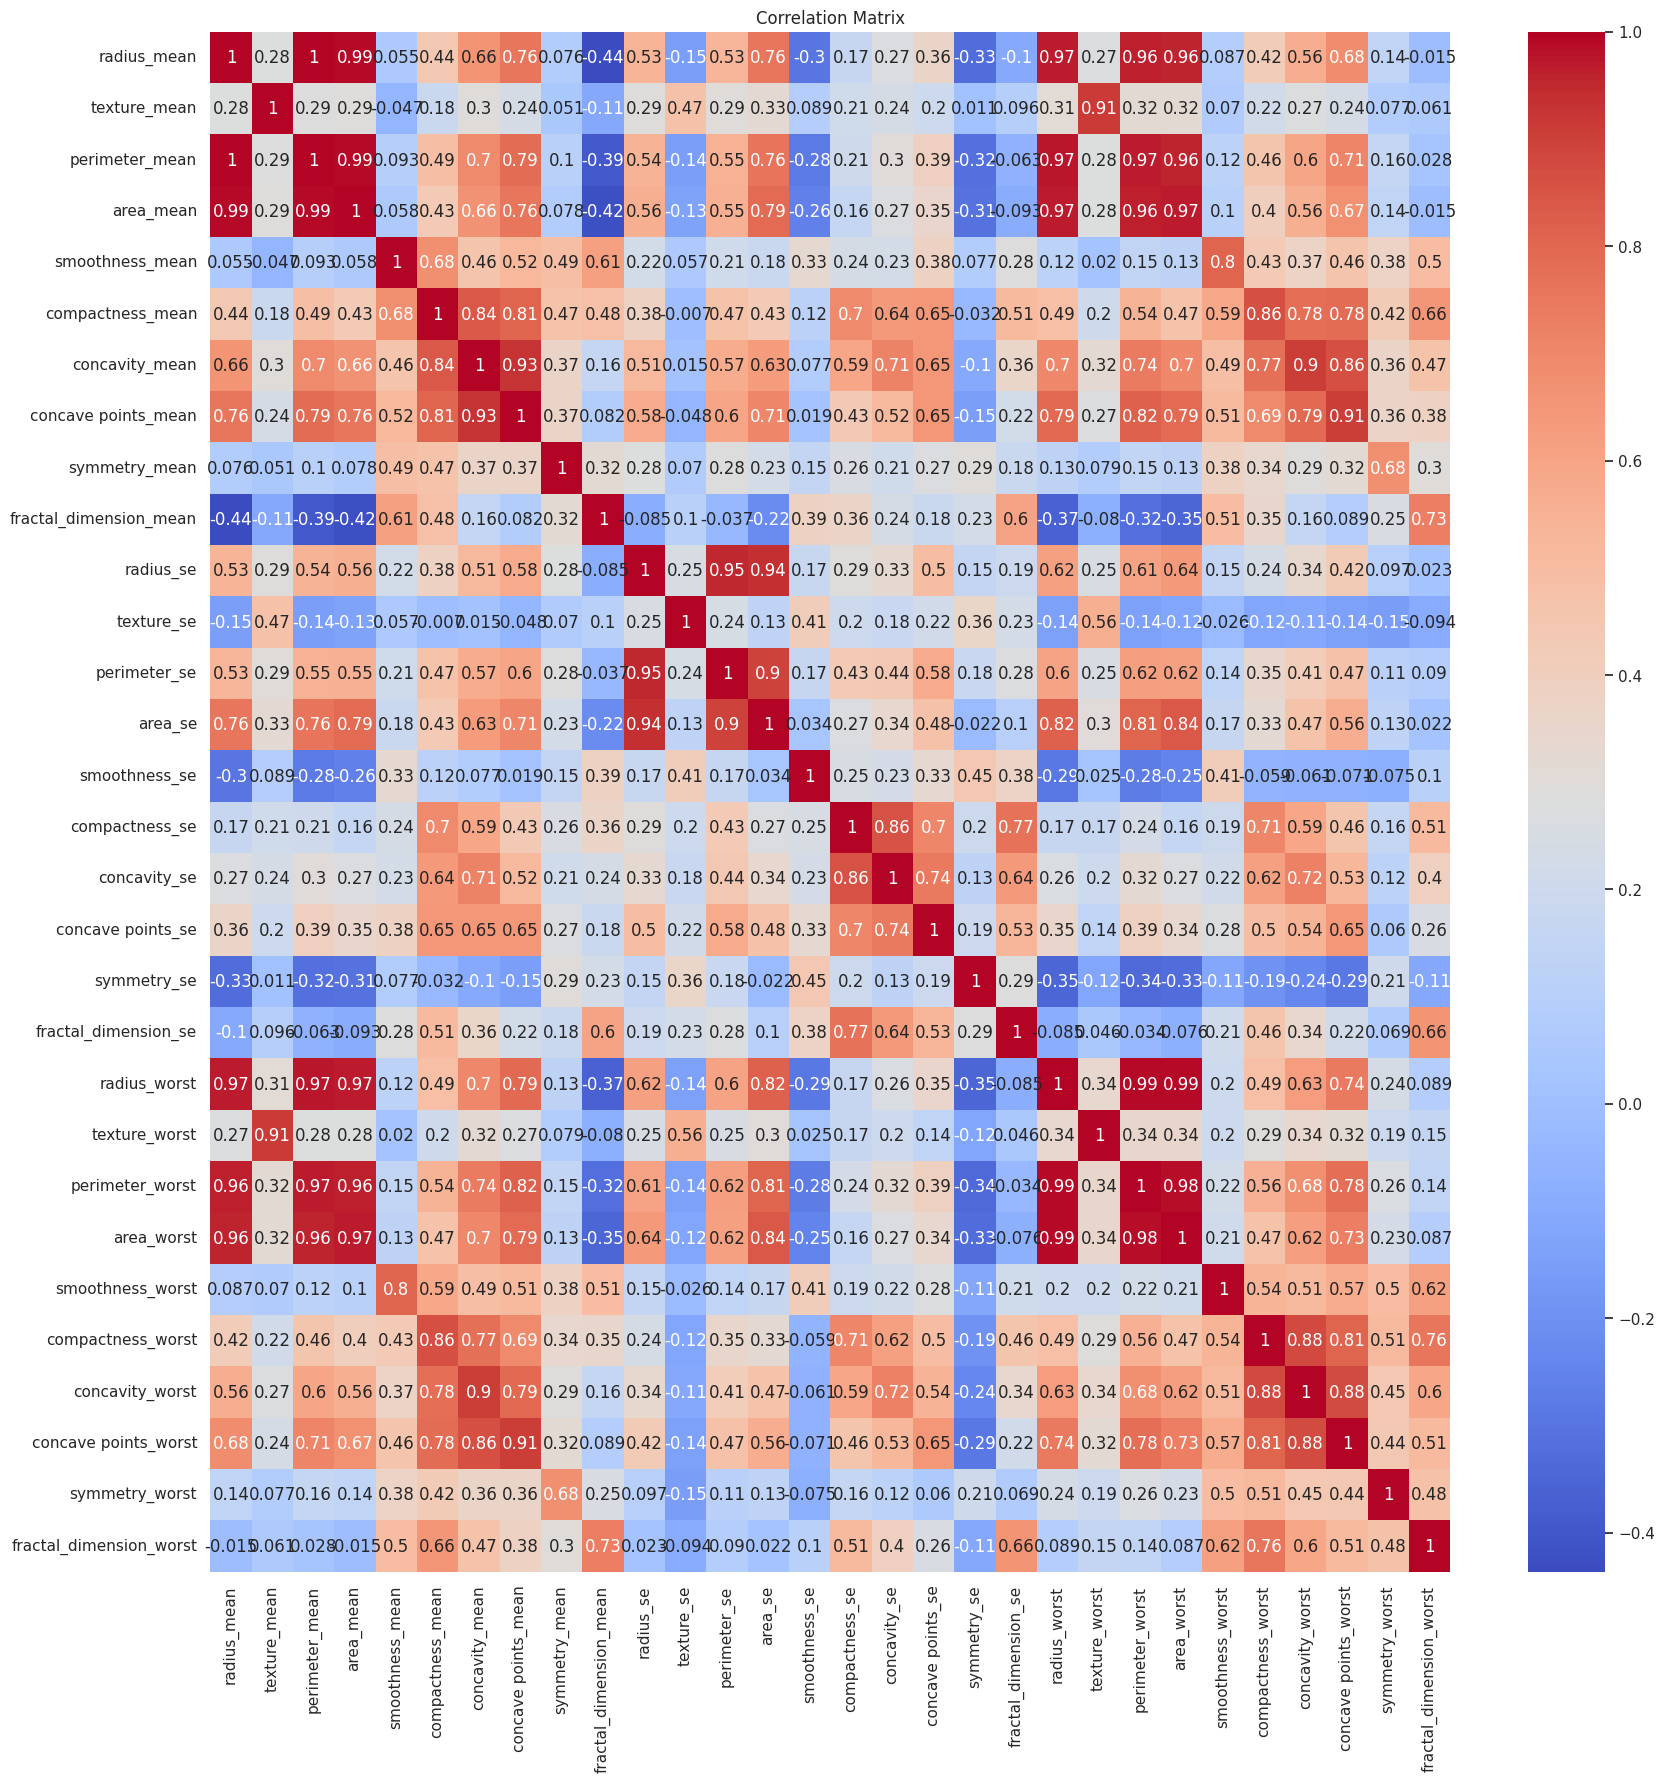

In [263]:
predictor_variables = filtered_data.drop('diagnosis', axis = 1)
# Calculate the correlation matrix
corr_matrix = predictor_variables.corr()

# Set up the figure size
plt.figure(figsize=(20, 20))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Matrix')
plt.show()


This code calculates the Variance Inflation Factor (VIF) for predictor variables to detect multicollinearity.

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = predictor_variables.columns
vif["VIF"] = [variance_inflation_factor(predictor_variables.values, i) for i in range(predictor_variables.shape[1])]

# Display the VIF results
print(vif)


                   Variable          VIF
0               radius_mean  5820.214565
1              texture_mean    18.541903
2            perimeter_mean  5469.101598
3                 area_mean   601.215462
4           smoothness_mean    10.986209
5          compactness_mean    48.428301
6            concavity_mean    73.662865
7       concave points_mean    56.688838
8             symmetry_mean     4.321393
9    fractal_dimension_mean    12.360484
10                radius_se    97.573349
11               texture_se     8.003810
12             perimeter_se    65.536337
13                  area_se    87.127778
14            smoothness_se     6.507533
15           compactness_se    28.915912
16             concavity_se    24.568210
17        concave points_se    16.001811
18              symmetry_se     7.278825
19     fractal_dimension_se    15.156504
20             radius_worst  1008.027138
21            texture_worst    33.407665
22          perimeter_worst   489.529627
23              

Feature selection 1 using VIF: This code removes variables with high VIF to decrease multicollinearity. It keeps variables with low VIF, shows their shape and initial rows.






In [265]:
# Set the threshold for high VIF values
threshold =70

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = predictor_variables.columns
vif["VIF"] = [variance_inflation_factor(predictor_variables.values, i) for i in range(predictor_variables.shape[1])]

# Select variables with low VIF values
low_vif_variables = vif[vif["VIF"] < threshold]["Variable"]

# Create a new DataFrame with variables having low VIF
predictor_variables_low_vif = predictor_variables[low_vif_variables]

# Display the variables with low VIF
features_1=predictor_variables_low_vif
print(features_1.shape)
features_1.head()


(398, 21)


texture_mean  smoothness_mean  compactness_mean  concave points_mean  \
6       0.160649        -0.123136          0.088295             0.646935   
7       0.358450         1.604049          1.140102             0.281950   
10      0.919273        -1.017686         -0.713542            -0.404686   
11     -0.325708         0.052642          0.471115             0.442131   
13      1.084495        -0.878913         -0.078478             0.121770   

    symmetry_mean  fractal_dimension_mean  texture_se  perimeter_se  \
6       -0.064325               -0.762332   -0.804940      0.155410   
7        1.403355                1.660353    0.290561      0.490051   
10      -1.035476               -0.826124   -0.054164     -0.198042   
11       0.110921               -0.280347   -0.420843      0.345502   
13       0.129175               -1.335044   -0.251928      0.018287   

    smoothness_se  compactness_se  ...  concave points_se  symmetry_se  \
6       -0.909030       -0.651568  ...          -0.228089    -0.829666   
7        0.588031        0.268933  ...           0.435349    -0.688004   
10      -1.004034       -0.905921  ...          -0.682114    -0.719485   
11      -0.423343        0.845713  ...           0.166080    -0.055974   
13       0.909377        0.323146  ...           1.317769     1.122119   

    fractal_dimension_se  texture_worst  smoothness_worst  compactness_worst  \
6              -0.611218       0.322883          0.518640           0.021215   
7               0.611669       0.401048          1.447961           0.724786   
10             -0.284787       1.335771         -0.625477          -0.630828   
11              0.132046       0.261002          0.316995           1.950627   
13             -0.299917       0.322883         -0.844656          -0.393548   

    concavity_worst  concave points_worst  symmetry_worst  \
6          0.509552              1.196716        0.262476   
7         -0.021054              0.624196        0.477640   
10        -0.605872             -0.226210        0.076431   
11         0.596387              1.010951        1.441838   
13        -0.191846             -0.041207       -0.148441   

    fractal_dimension_worst  
6                 -0.014730  
7                  1.726435  
10                 0.031819  
11                 1.155652  
13                -1.167934  

[5 rows x 21 columns]

Feature selection 2 using forward selection with SVC:
This code uses Sequential Forward Feature Selector with a Support Vector Machine (SVC) model for feature selection. It identifies the most relevant features for classification and prints their names

In [266]:
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

# Select predictor variables (features) and target variable
target_variable = filtered_data['diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variable, test_size=0.2, random_state=42)

# Initialize the SVC model
svc_model = SVC()

# Forward selection using SequentialFeatureSelector
selector = SequentialFeatureSelector(svc_model, direction='forward')
selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features_svc = X_train.columns[selected_feature_indices]

# Display the selected features
print("Selected Features:")
print(selected_features_svc)


Selected Features:
Index(['texture_mean', 'perimeter_mean', 'smoothness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'concave points_se', 'radius_worst', 'perimeter_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [267]:
# Create a DataFrame with the selected features with svc
predictor_variables_forward_selection_svc = predictor_variables.iloc[:, selected_feature_indices]

# Display the selected features DataFrame
print("Selected Features:")
features_2 =predictor_variables_forward_selection_svc
features_2

Selected Features:


texture_mean  perimeter_mean  smoothness_mean  concave points_mean  \
6        0.160649        1.138125        -0.123136             0.646935   
7        0.358450       -0.072867         1.604049             0.281950   
10       0.919273        0.442011        -1.017686            -0.404686   
11      -0.325708        0.479082         0.052642             0.442131   
13       1.084495        0.483201        -0.878913             0.121770   
..            ...             ...              ...                  ...   
554      2.241047       -0.390031        -1.076753            -0.657467   
555      1.936202       -1.083262        -0.431283            -0.555580   
558      0.788958        0.182100        -0.827674            -0.298156   
560      1.829157       -0.024262         0.208495            -0.151647   
566      2.045574        0.672676        -0.840484             0.105777   

     symmetry_mean  fractal_dimension_mean  radius_se  concave points_se  \
6        -0.064325               -0.762332   0.149883          -0.228089   
7         1.403355                1.660353   0.643623           0.435349   
10       -1.035476               -0.826124  -0.092656          -0.682114   
11        0.110921               -0.280347   0.363187           0.166080   
13        0.129175               -1.335044  -0.006757           1.317769   
..             ...                     ...        ...                ...   
554      -0.896740               -0.810531  -0.698642          -0.677410   
555      -0.798164               -0.216555  -0.668686           0.878181   
558      -1.305645               -0.188203  -0.648835           0.691640   
560      -1.002617               -0.154180  -0.146794           0.724082   
566      -0.809117               -0.895587   0.184892           0.612157   

     radius_worst  perimeter_worst  smoothness_worst  compactness_worst  \
6        1.368983         1.368325          0.518640           0.021215   
7        0.163763         0.099449          1.447961           0.724786   
10       0.604849         0.492622         -0.625477          -0.630828   
11       0.859560         0.870902          0.316995           1.950627   
13       0.118205         0.141149         -0.844656          -0.393548   
..            ...              ...               ...                ...   
554     -0.492689        -0.548691         -0.423831          -0.586935   
555     -1.124290        -1.122664          0.264392          -0.529682   
558     -0.163427        -0.040545         -1.304933           0.399718   
560     -0.200702        -0.210324         -0.362461          -0.177261   
566      0.561361         0.579001         -0.809587           0.350735   

     concavity_worst  concave points_worst  symmetry_worst  
6           0.509552              1.196716        0.262476  
7          -0.021054              0.624196        0.477640  
10         -0.605872             -0.226210        0.076431  
11          0.596387              1.010951        1.441838  
13         -0.191846             -0.041207       -0.148441  
..               ...                   ...             ...  
554        -0.135715             -0.756400       -0.855411  
555        -0.346326             -0.355331       -1.091607  
558         0.451022             -0.062524       -1.039838  
560        -0.669679             -0.149315       -1.052780  
566         0.326767              0.414069       -1.104549  

[398 rows x 15 columns]

Feature selection 3: This code employs Sequential Feature Selector with a Random Forest Classifier to select significant features for classification. It then displays the names of the selected features.

In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Select predictor variables (features) and target variable

target_variable = filtered_data['diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variable, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier()

# Forward feature selection using SequentialFeatureSelector
selector = SequentialFeatureSelector(rf_model, direction='forward')
selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_rf = selector.get_support(indices=True)

# Get the selected feature names
selected_features_rf = X_train.columns[selected_feature_indices_rf]

# Create a DataFrame with the selected features
predictor_variables_forward_selection_rf = predictor_variables.iloc[:, selected_feature_indices_rf]

# Display the selected features
print("Selected Features:")
features_3 = predictor_variables_forward_selection_rf
features_3.columns


Selected Features:


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst'],
      dtype='object')

Feature selection 4 using PCA: This code applies Principal Component Analysis (PCA) to condense predictor variable dimensions and extract essential components.

In [269]:
from sklearn.decomposition import PCA

# Standardize the predictor variables
scaler = StandardScaler()
predictor_variables_scaled = scaler.fit_transform(predictor_variables)

# Perform PCA
pca = PCA(n_components=4)  # Specify the number of components you want to keep
principal_components = pca.fit_transform(predictor_variables_scaled)

# Create a DataFrame with the principal components
principal_components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Display the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Display the principal components DataFrame
print("Principal Components:")
features_4=principal_components_df
features_4.head()


Explained Variance Ratio:
[0.42529016 0.18702917 0.10037725 0.06388785]
Principal Components:


PC1       PC2       PC3       PC4
0  5.927067  3.505417 -1.262764 -0.918328
1  5.157012 -4.175216  0.292621 -1.952160
2  1.173013  3.408498  0.414729  0.264824
3  6.369327 -0.739285 -0.732368 -0.143661
4  2.786797  0.666649  3.394382  0.267920

**Diagnosis Model - Support vector Classiffier for Feature selection 1, 2, 3 and 4**

This code trains an SVM (Support Vector Machine) model with a linear kernel and plots its decision boundary along with data points. The plot displays how the model separates 'Benign' and 'Malignant' cases based on the 'radius_mean' and 'texture_mean' features. The same process can be apply to any other selected features of choice.

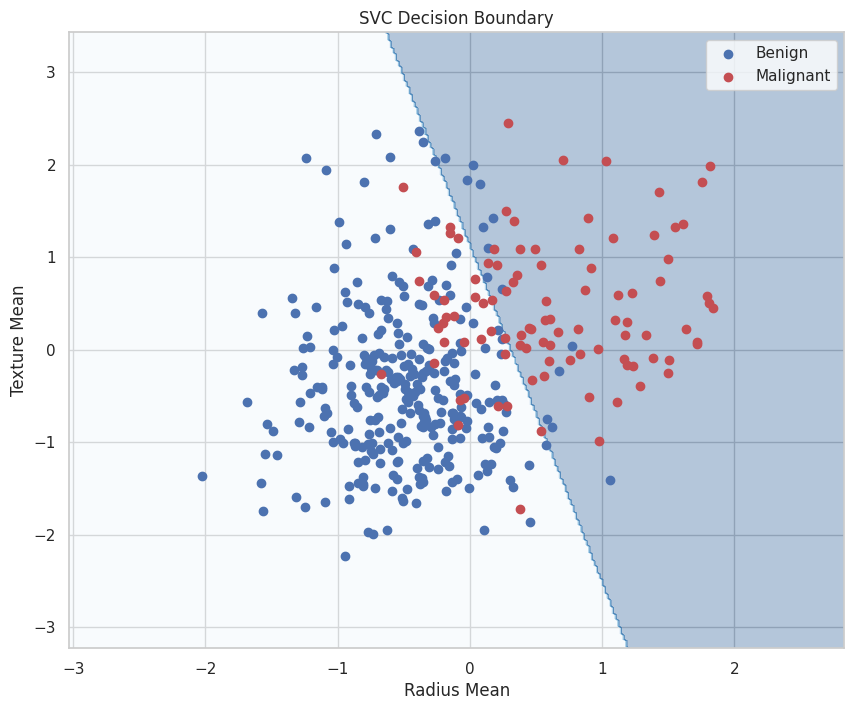

In [270]:
# Extract the features and target variable
X = predictor_variables[['radius_mean', 'texture_mean']]
y = filtered_data['diagnosis']

# Fit the SVC model
model = SVC(kernel='linear')
model.fit(X, y)

# Create a meshgrid of points to evaluate the model
x_min, x_max = X['radius_mean'].min() - 1, X['radius_mean'].max() + 1
y_min, y_max = X['texture_mean'].min() - 1, X['texture_mean'].max() + 1
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

# Plot the data points
plt.scatter(X[y == 0]['radius_mean'], X[y == 0]['texture_mean'], color='b', label='Benign')
plt.scatter(X[y == 1]['radius_mean'], X[y == 1]['texture_mean'], color='r', label='Malignant')

# Set plot labels and title
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('SVC Decision Boundary')

# Show legend
plt.legend()

# Show the plot
plt.show()

we can also calculates and prints the best hyperplane and margin.

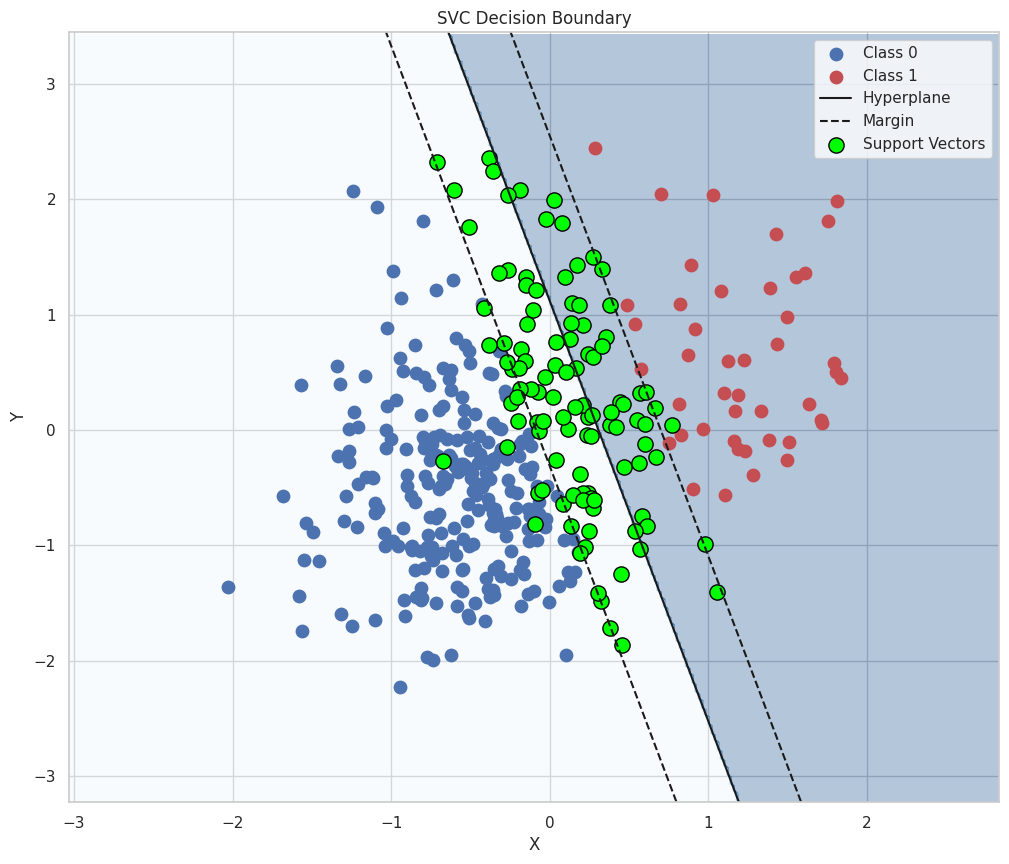

Best Hyperplane: [2.45405899 0.67332411]
Margin: 0.3929653547818904


In [271]:
from sklearn.svm import SVC

def plot_svc_decision_boundary(X, y):
    # Convert X to a NumPy array
    X = X.values

    # Fit the SVC model
    model = SVC(kernel='linear')
    model.fit(X, y)

    # Create a meshgrid of points to evaluate the model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Set plot limits and figure size
    plt.figure(figsize=(12, 10))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Plot the decision boundary, hyperplane, margin, and support vectors
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

    # Plot the data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='Class 0', s=80)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Class 1', s=80)

    # Get the separating hyperplane
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx_hyperplane = np.linspace(x_min, x_max)
    yy_hyperplane = a * xx_hyperplane - (model.intercept_[0]) / w[1]

    # Plot the hyperplane
    plt.plot(xx_hyperplane, yy_hyperplane, 'k-', label='Hyperplane')

    # Get the parallel support vectors
    margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
    yy_margin_top = yy_hyperplane + a * margin
    yy_margin_bottom = yy_hyperplane - a * margin

    # Plot the margin
    plt.plot(xx_hyperplane, yy_margin_top, 'k--', label='Margin')
    plt.plot(xx_hyperplane, yy_margin_bottom, 'k--')

    # Plot support vectors
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='lime', label='Support Vectors', s=120, edgecolors='black')

    # Set plot labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('SVC Decision Boundary')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()


# Extract the features and target variable
X = predictor_variables[['radius_mean', 'texture_mean']]
y = filtered_data['diagnosis']
plot_svc_decision_boundary(X, y)

# Get the best hyperplane and margin
model = SVC(kernel='linear')
model.fit(X, y)
best_hyperplane = model.coef_[0]
margin = 1 / np.sqrt(np.sum(best_hyperplane ** 2))
print("Best Hyperplane:", best_hyperplane)
print("Margin:", margin)


This code defines a function train_and_evaluate that trains and evaluates an SVM model using grid search cross-validation. It calculates and prints metrics such as best hyperparameters, cross-validation score, accuracy, precision, recall, F1-score, and confusion matrix. The function takes predictor variables X, target variable y, the model to evaluate, and a parameter grid for grid search as inputs. It performs grid search, trains the best model, predicts on the test set, and computes evaluation metrics.

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def train_and_evaluate(X, y, model, param_grid):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a grid search cross-validation object
    grid_search = GridSearchCV(model, param_grid, cv=10)

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and CV score
    best_params_svm = grid_search.best_params_
    best_score_svm = grid_search.best_score_

    # Get the best model based on the grid search
    best_model_svm = grid_search.best_estimator_

    # Train the best model on the full training set
    best_model_svm.fit(X_train, y_train)

    # Predict on the test set using the best model
    y_pred_svm = best_model_svm.predict(X_test)

    # Compute evaluation metrics
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    precision_svm = precision_score(y_test, y_pred_svm)
    recall_svm = recall_score(y_test, y_pred_svm)
    f1_svm = f1_score(y_test, y_pred_svm)
    cm_svm = confusion_matrix(y_test, y_pred_svm)

    # Print the evaluation metrics
    print("Best Hyperparameters:", best_params_svm)
    print("Best CV Score:", best_score_svm)
    print("Accuracy:", accuracy_svm)
    print("Precision:", precision_svm)
    print("Recall:", recall_svm)
    print("F1-Score:", f1_svm)
    print("Confusion Matrix:\n", cm_svm)


SVC for features 1

In [273]:
X=features_1
y= filtered_data['diagnosis']
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.1, 1, 10]
}
train_and_evaluate(X, y, model, param_grid)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best CV Score: 0.9559475806451614
Accuracy: 0.95
Precision: 1.0
Recall: 0.84
F1-Score: 0.9130434782608696
Confusion Matrix:
 [[55  0]
 [ 4 21]]


SVC for features 2

In [274]:
X=features_2
y= filtered_data['diagnosis']
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.1, 1, 10]
}
train_and_evaluate(X, y, model, param_grid)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.9780241935483872
Accuracy: 0.9625
Precision: 1.0
Recall: 0.88
F1-Score: 0.9361702127659575
Confusion Matrix:
 [[55  0]
 [ 3 22]]


SVC for features 3

In [275]:
X=features_3
y= filtered_data['diagnosis']
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.1, 1, 10]
}
train_and_evaluate(X, y, model, param_grid)

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best CV Score: 0.9717741935483872
Accuracy: 0.95
Precision: 1.0
Recall: 0.84
F1-Score: 0.9130434782608696
Confusion Matrix:
 [[55  0]
 [ 4 21]]


SVC for features 4

In [276]:
X=features_4
y= filtered_data['diagnosis']
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.1, 1, 10]
}
train_and_evaluate(X, y, model, param_grid)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best CV Score: 0.9403225806451612
Accuracy: 0.875
Precision: 0.8260869565217391
Recall: 0.76
F1-Score: 0.7916666666666667
Confusion Matrix:
 [[51  4]
 [ 6 19]]


**Diagnosis Model - Random forest classifier Classiffier for all features**

the code trains a Random Forest classifier and visualizes its first decision tree. We can visualize other decision trees by increasing the estimate index.

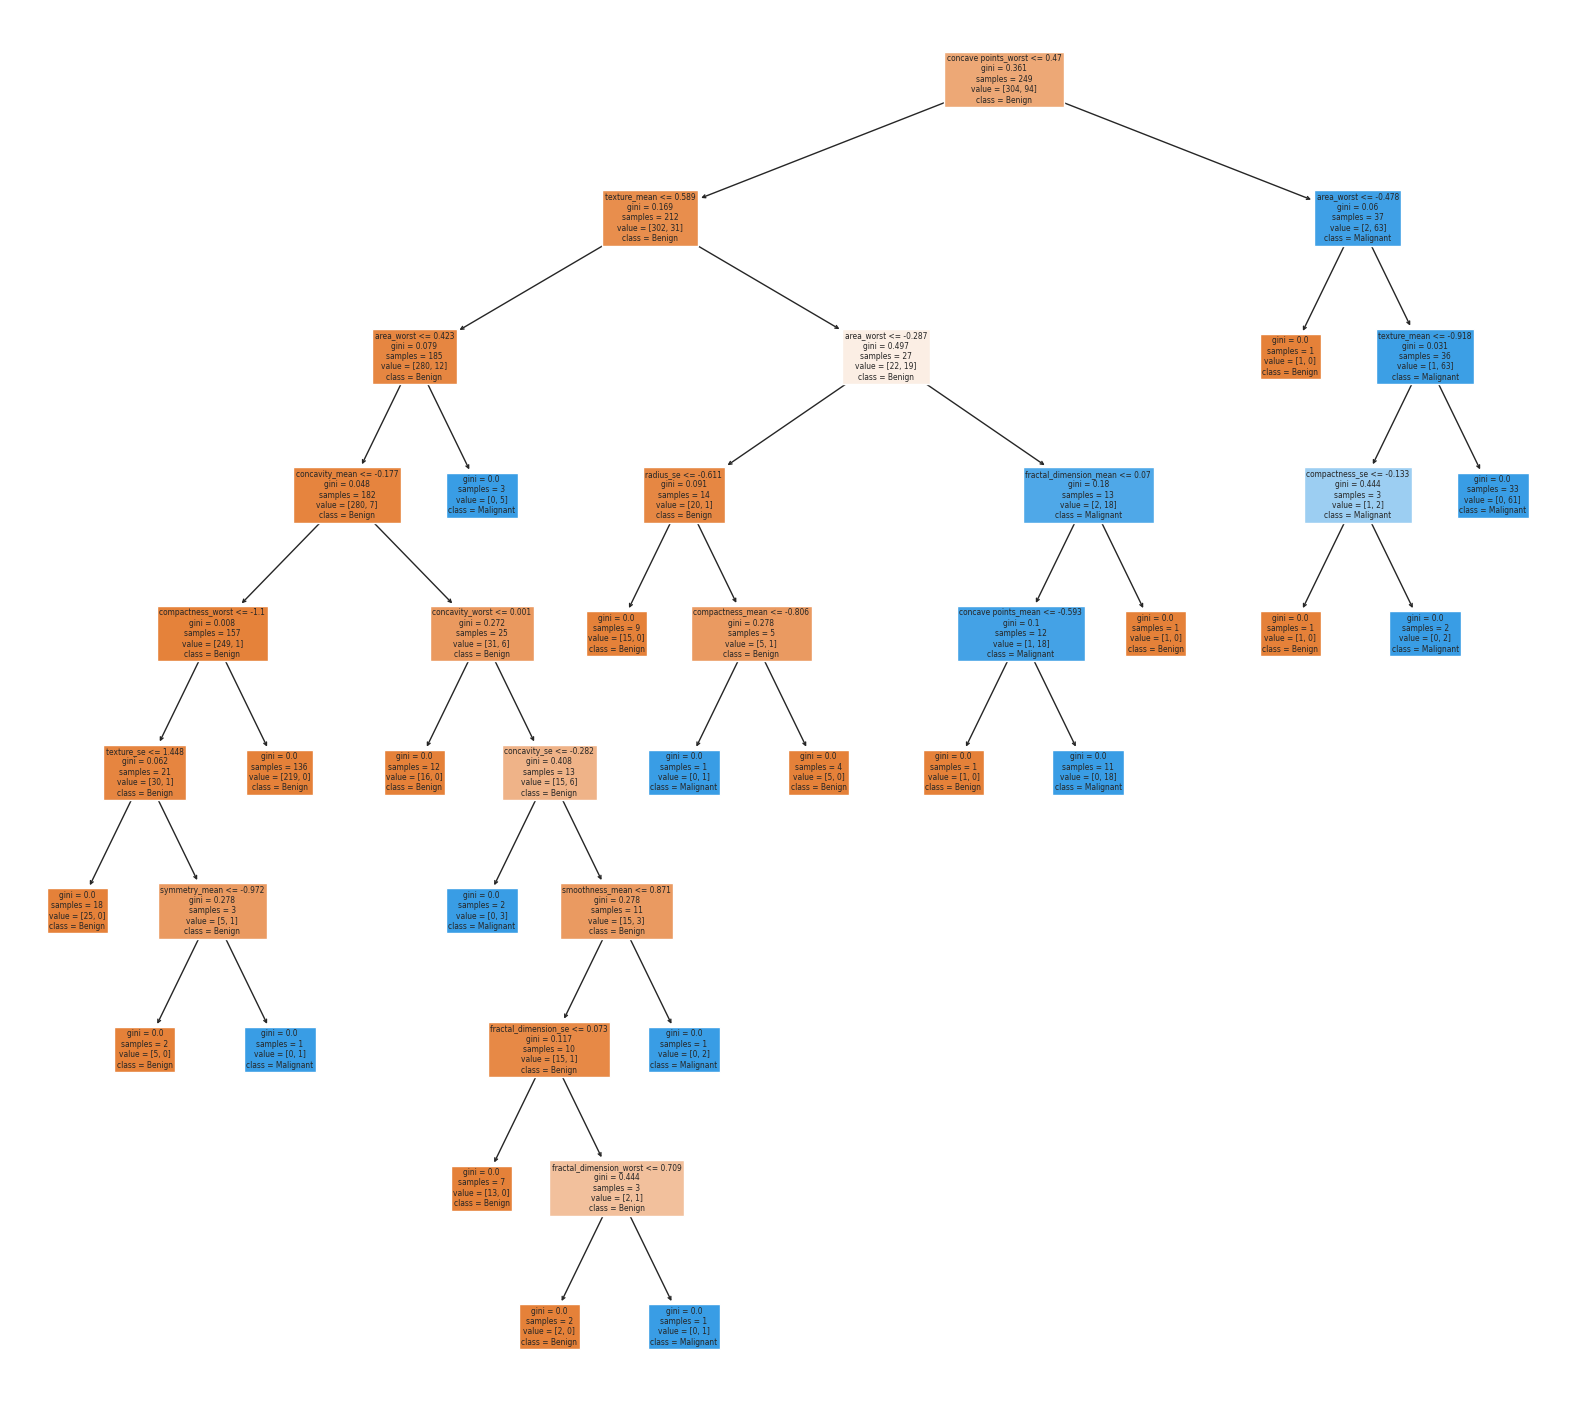

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


X = predictor_variables
target_names = {0: 'Benign', 1: 'Malignant'}
y1 = filtered_data['diagnosis'].map(target_names)



# Train a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X, y1)

# Plot the first decision tree in the Random Forest
plt.figure(figsize=(20, 18))
plot_tree(random_forest.estimators_[0], feature_names=X.columns, class_names=target_names, filled=True)
plt.show()


performing thesame precedure we define a function train_and_evaluate that trains and evaluates a Random Forest classifier using grid search. It calculates and prints metrics including best hyperparameters, cross-validation score, accuracy, precision, recall, F1-score, and confusion matrix. The function takes predictor variables X, target variable y, and a parameter grid, performing grid search, training, prediction, and metric calculation.






In [278]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate(X, y, param_grid):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest classifier
    rf = RandomForestClassifier()

    # Create a grid search cross-validation object
    grid_search = GridSearchCV(rf, param_grid, cv=5)

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and CV score
    best_params_rf = grid_search.best_params_
    best_score_rf = grid_search.best_score_

    # Get the best model based on the grid search
    best_model_rf = grid_search.best_estimator_

    # Train the best model on the full training set
    best_model_rf.fit(X_train, y_train)

    # Predict on the test set using the best model
    y_pred_rf = best_model_rf.predict(X_test)

    # Compute evaluation metrics
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    cm_rf = confusion_matrix(y_test, y_pred_rf)

    # Print the evaluation metrics
    print("Best Hyperparameters:", best_params_rf)
    print("Best CV Score:", best_score_rf)
    print("Accuracy:", accuracy_rf)
    print("Precision:", precision_rf)
    print("Recall:", recall_rf)
    print("F1-Score:", f1_rf)
    print("Confusion Matrix:\n", cm_rf)


Training and testing features 1 with Random Forest

In [279]:
X = features_1
y = filtered_data['diagnosis']

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Call the train_and_evaluate function
train_and_evaluate(X, y, param_grid)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.9402281746031745
Accuracy: 0.9375
Precision: 1.0
Recall: 0.8
F1-Score: 0.888888888888889
Confusion Matrix:
 [[55  0]
 [ 5 20]]


Training and testing features 2 with Random Forest

In [280]:
X = features_2
y = filtered_data['diagnosis']

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Call the train_and_evaluate function
train_and_evaluate(X, y, param_grid)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9435019841269842
Accuracy: 0.9375
Precision: 1.0
Recall: 0.8
F1-Score: 0.888888888888889
Confusion Matrix:
 [[55  0]
 [ 5 20]]


Training and testing features 3 with Random Forest

In [281]:
X = features_3
y = filtered_data['diagnosis']

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Call the train_and_evaluate function
train_and_evaluate(X, y, param_grid)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.965625
Accuracy: 0.9
Precision: 0.9473684210526315
Recall: 0.72
F1-Score: 0.8181818181818181
Confusion Matrix:
 [[54  1]
 [ 7 18]]


Training and testing features 4 with Random Forest

In [282]:
X = features_4
y = filtered_data['diagnosis']

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Call the train_and_evaluate function
train_and_evaluate(X, y, param_grid)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9307539682539684
Accuracy: 0.9125
Precision: 0.875
Recall: 0.84
F1-Score: 0.8571428571428572
Confusion Matrix:
 [[52  3]
 [ 4 21]]


A Function to get the most important feature for each model

In [283]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def get_feature_importance(X, y):
    # Train a Random Forest classifier
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest.fit(X, y)

    # Get feature importances
    importances = random_forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X.columns

    # Create a sorted dataframe of feature importances
    importance_df = pd.DataFrame({'Feature': feature_names[indices], 'Importance': importances[indices]})

    # Plot feature importances using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
    plt.title("Feature Importance", fontsize=16)
    plt.xlabel("Feature", fontsize=14)
    plt.ylabel("Importance", fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()

    # Return feature importances
    return importances, feature_names[indices]



 Importance features for features 1

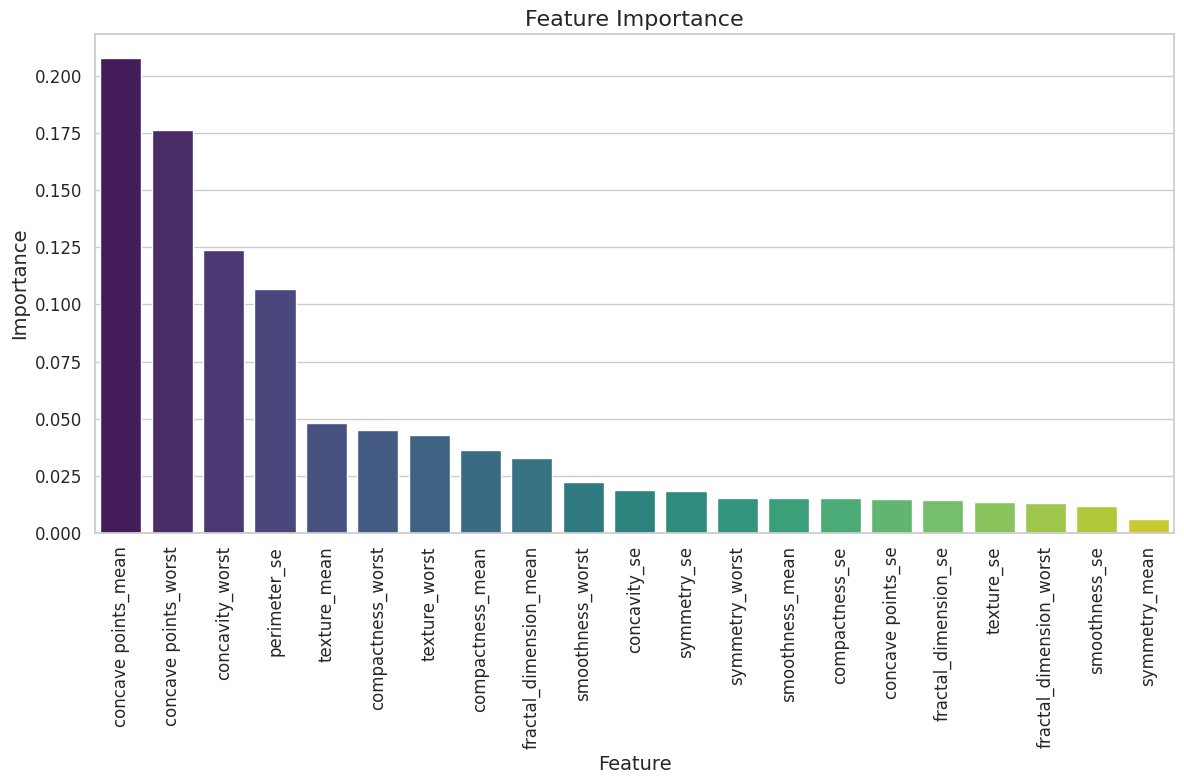

In [284]:
# Features importance for model 1:
X = features_1
y = filtered_data['diagnosis']
importances, feature_names = get_feature_importance(X, y)


 Importance features for features 2

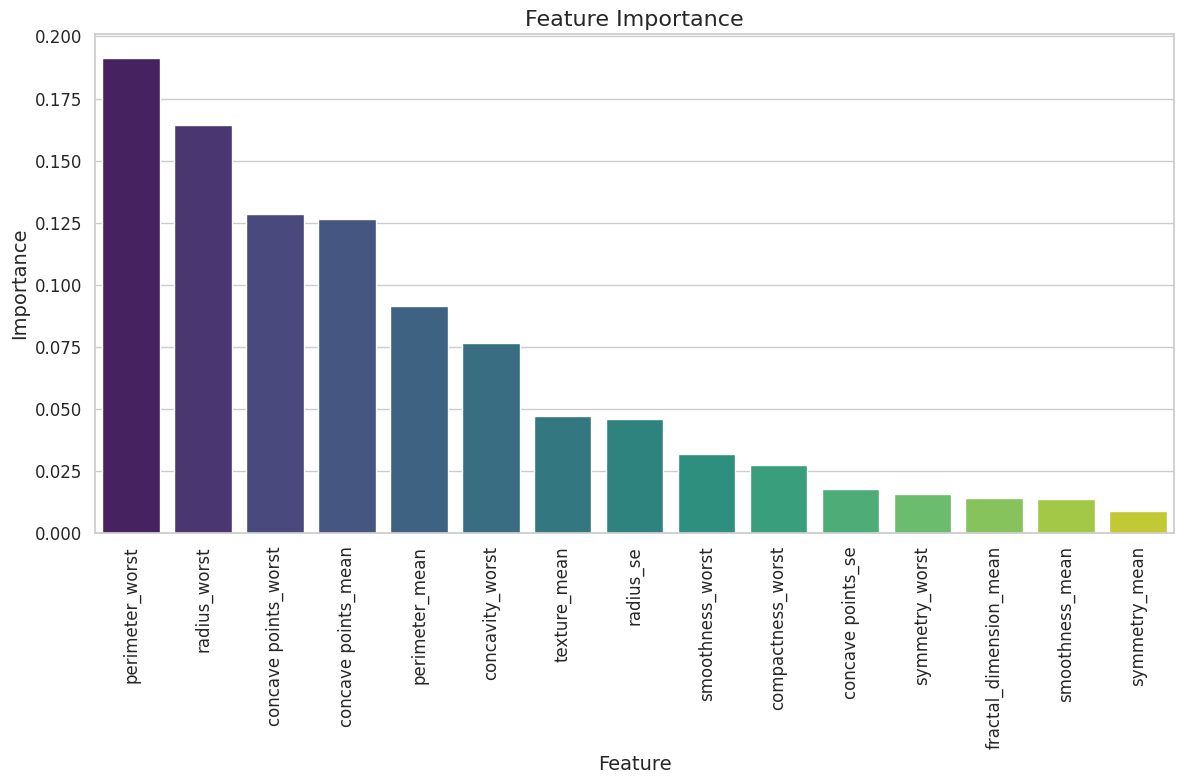

In [285]:
# Features importance for model 2:
X = features_2
y = filtered_data['diagnosis']
importances, feature_names = get_feature_importance(X, y)

 Importance features for model 3

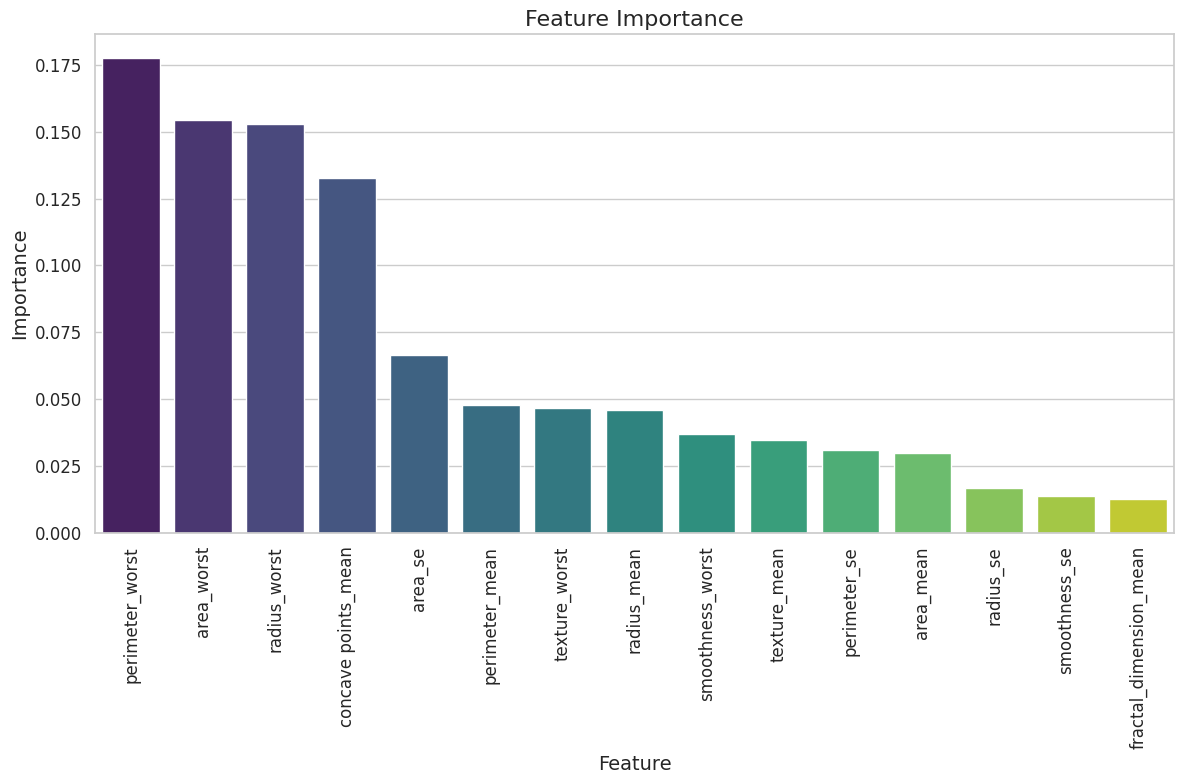

In [286]:
# Features importance for model 3:
X = features_3
y = filtered_data['diagnosis']
importances, feature_names = get_feature_importance(X, y)

 Importance features for features 4

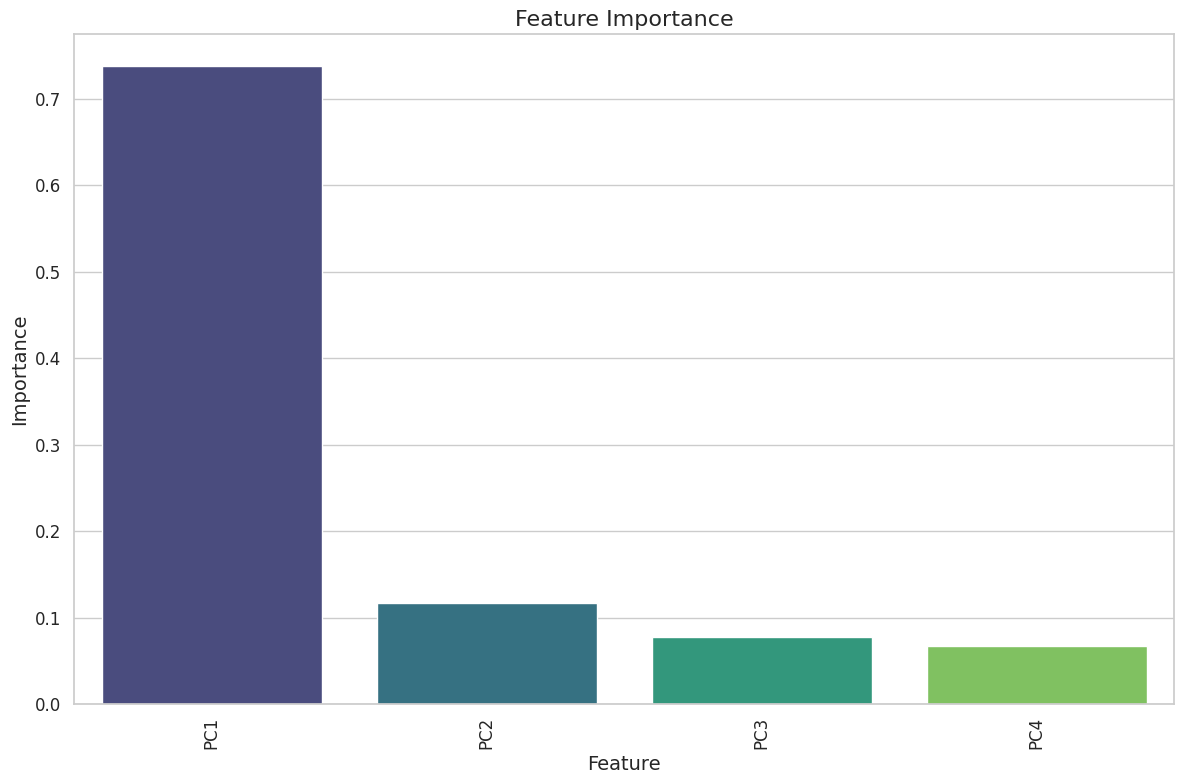

In [287]:
# Features importance for model 4:
X = features_4
y = filtered_data['diagnosis']
importances, feature_names = get_feature_importance(X, y)

The function uses grid search to train and evaluate a Logistic Regression classifier.

In [288]:
from sklearn.linear_model import LogisticRegression

def train_and_evaluate(X, y, param_grid):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a logistic regression classifier
    lr = LogisticRegression()

    # Create a grid search cross-validation object
    grid_search = GridSearchCV(lr, param_grid, cv=10)

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and CV score
    best_params_lr = grid_search.best_params_
    best_score_lr = grid_search.best_score_

    # Get the best model based on the grid search
    best_model_lr = grid_search.best_estimator_

    # Train the best model on the full training set
    best_model_lr.fit(X_train, y_train)

    # Predict on the test set using the best model
    y_pred_lr = best_model_lr.predict(X_test)

    # Compute evaluation metrics
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr)
    recall_lr = recall_score(y_test, y_pred_lr)
    f1_lr = f1_score(y_test, y_pred_lr)
    cm_lr = confusion_matrix(y_test, y_pred_lr)

    # Print the evaluation metrics
    print("Best Hyperparameters:", best_params_lr)
    print("Best CV Score:", best_score_lr)
    print("Accuracy:", accuracy_lr)
    print("Precision:", precision_lr)
    print("Recall:", recall_lr)
    print("F1-Score:", f1_lr)
    print("Confusion Matrix:\n", cm_lr)


Training and testing feature 1 with Logistic Regression

In [289]:
X = features_1
y = filtered_data['diagnosis']

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Call the train_and_evaluate function
train_and_evaluate(X, y, param_grid)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best CV Score: 0.9559475806451614
Accuracy: 0.9375
Precision: 0.9545454545454546
Recall: 0.84
F1-Score: 0.8936170212765958
Confusion Matrix:
 [[54  1]
 [ 4 21]]


Training and testing feature 2 with Logistic Regression

In [290]:
X = features_2
y = filtered_data['diagnosis']

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Call the train_and_evaluate function
train_and_evaluate(X, y, param_grid)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best CV Score: 0.9748991935483872
Accuracy: 0.9625
Precision: 1.0
Recall: 0.88
F1-Score: 0.9361702127659575
Confusion Matrix:
 [[55  0]
 [ 3 22]]


Training and testing features 3 with Logistic Regression

In [291]:
X = features_3
y = filtered_data['diagnosis']

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Call the train_and_evaluate function
train_and_evaluate(X, y, param_grid)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best CV Score: 0.9748991935483872
Accuracy: 0.9625
Precision: 1.0
Recall: 0.88
F1-Score: 0.9361702127659575
Confusion Matrix:
 [[55  0]
 [ 3 22]]


Training and testing features 4 with Logistic Regression

In [292]:
X = features_4
y = filtered_data['diagnosis']

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Call the train_and_evaluate function
train_and_evaluate(X, y, param_grid)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best CV Score: 0.9372983870967744
Accuracy: 0.9
Precision: 0.8695652173913043
Recall: 0.8
F1-Score: 0.8333333333333333
Confusion Matrix:
 [[52  3]
 [ 5 20]]


**Bar chart graphical representation for models performance**

In [293]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_model_performance(models_metrics):
    # Create a DataFrame from the models_metrics dictionary
    df = pd.DataFrame(data=models_metrics)
    df.rename(index={0: 'Accuracy', 1: 'Precision', 2: 'Recall', 3: 'F1-Score'}, inplace=True)

    # Plot the bar chart
    ax = df.plot(kind='bar', figsize=(18, 15), ylim=(0.6, 1.1),
                 color=['orange', 'green', 'blue'],
                 rot=0, title='Model Performance',
                 edgecolor='grey', alpha=0.5)

    # Annotate the bars with their values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.01, p.get_height() * 1.005))

    # Show the plot
    plt.show()


Bar chart representation of Evaluation metrics for features 1

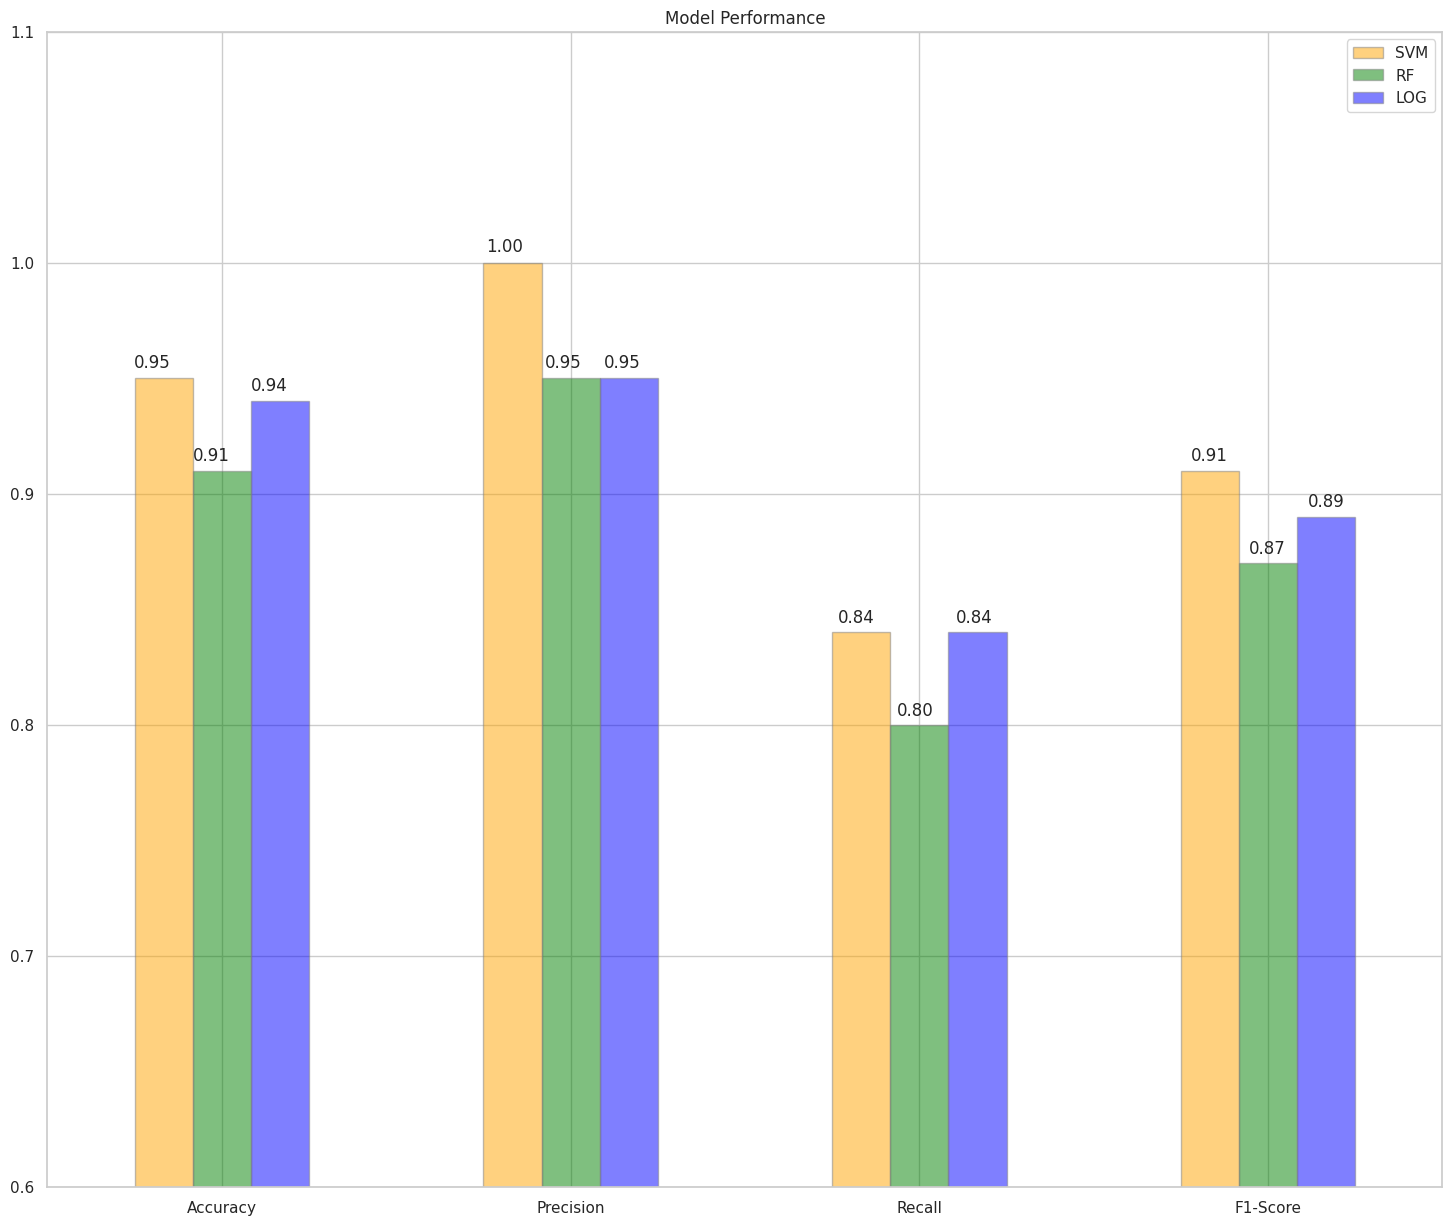

In [294]:
features1_metrics = {
    'SVM': [0.95, 1.0, 0.84, 0.91],
    'RF': [0.91, 0.95, 0.80, 0.87],
    'LOG': [0.94, 0.95, 0.84, 0.89]
}

plot_model_performance(features1_metrics)


Bar chart representation of Evaluation metrics for features 2

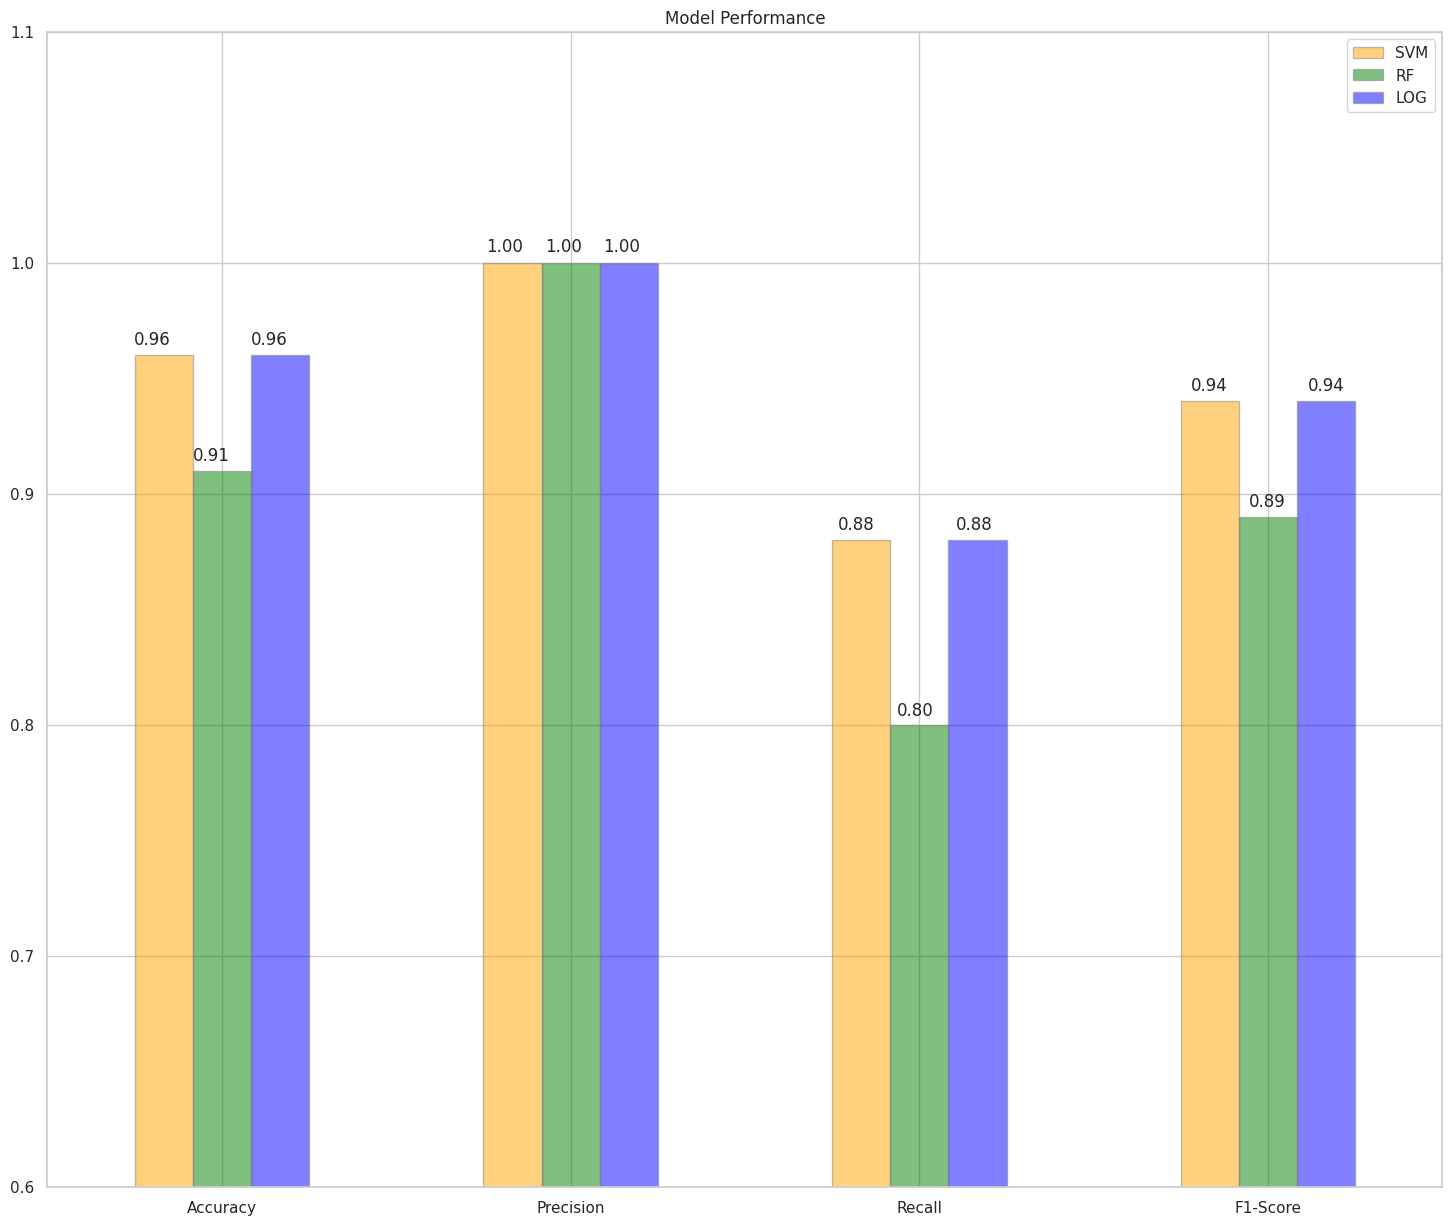

In [295]:
features2_metrics = {
    'SVM': [0.96, 1.0, 0.88, 0.94],
    'RF': [0.91, 1.0, 0.80, 0.89],
    'LOG': [0.96, 1.0, 0.88, 0.94]
}

plot_model_performance(features2_metrics)


Bar chart representation of Evaluation metrics for features 3

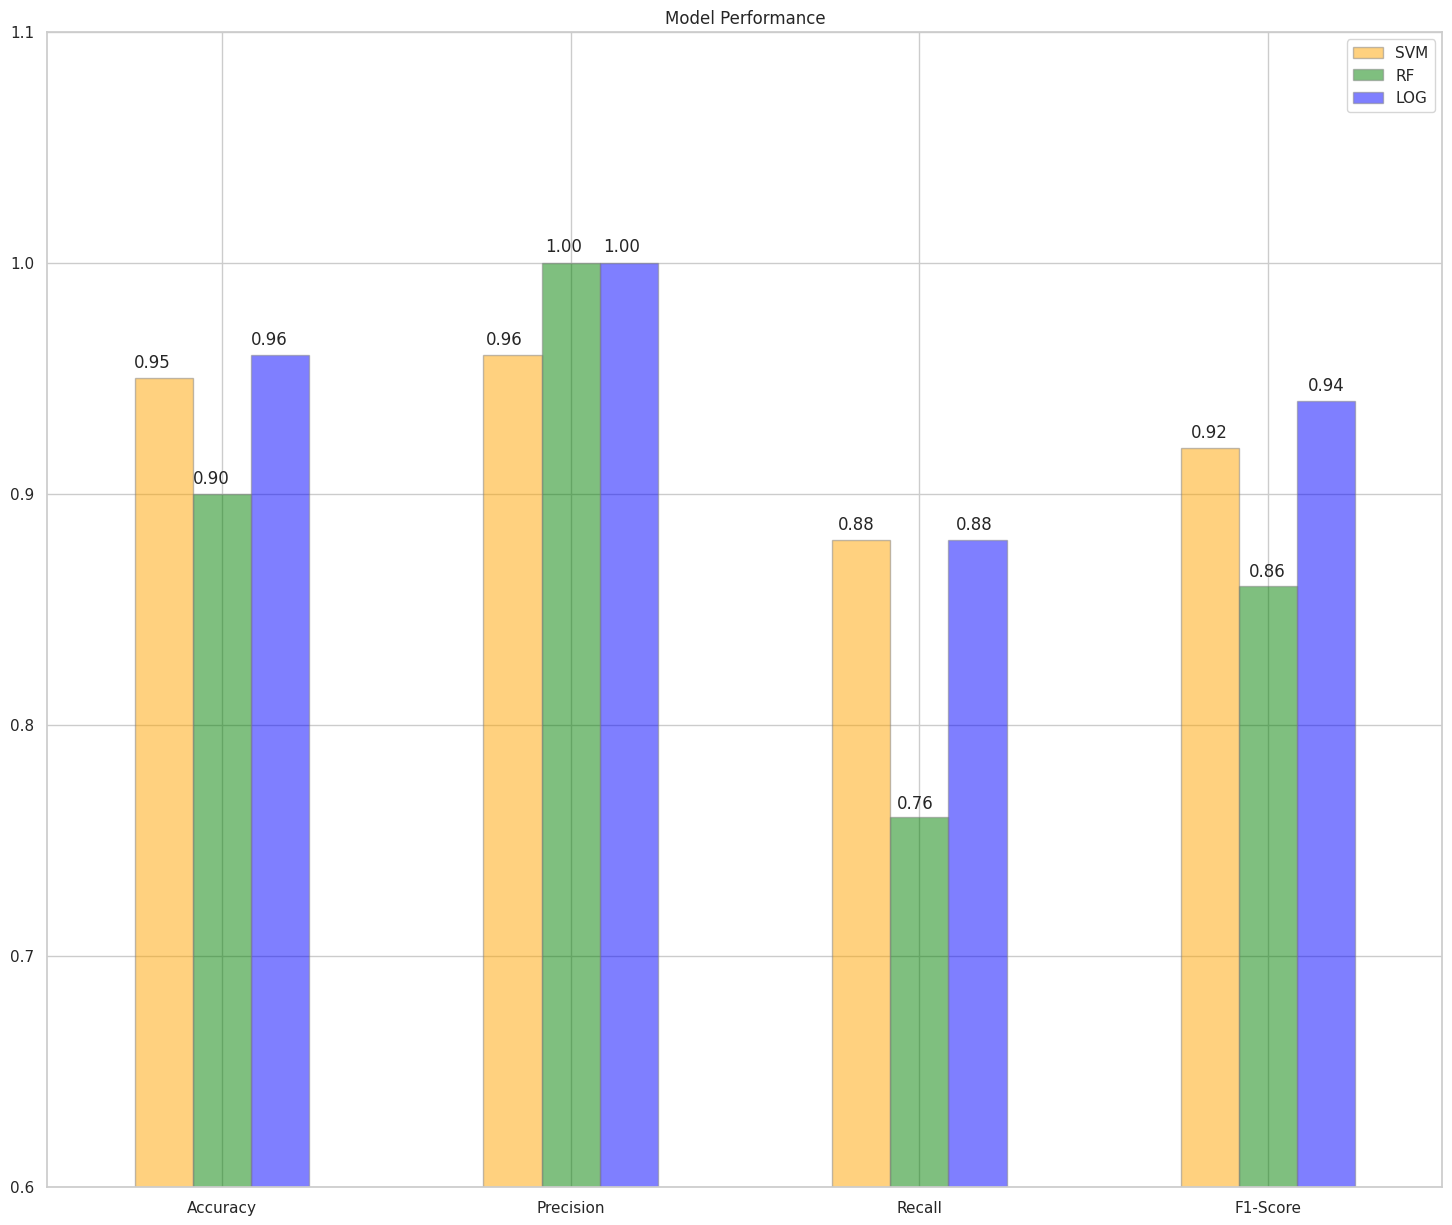

In [296]:
features3_metrics = {
    'SVM': [0.95, 0.96, 0.88, 0.92],
    'RF': [0.90, 1.0, 0.76, 0.86],
    'LOG': [0.96, 1.0, 0.88, 0.94]
}

plot_model_performance(features3_metrics)


Bar chart representation of Evaluation metrics for features 4

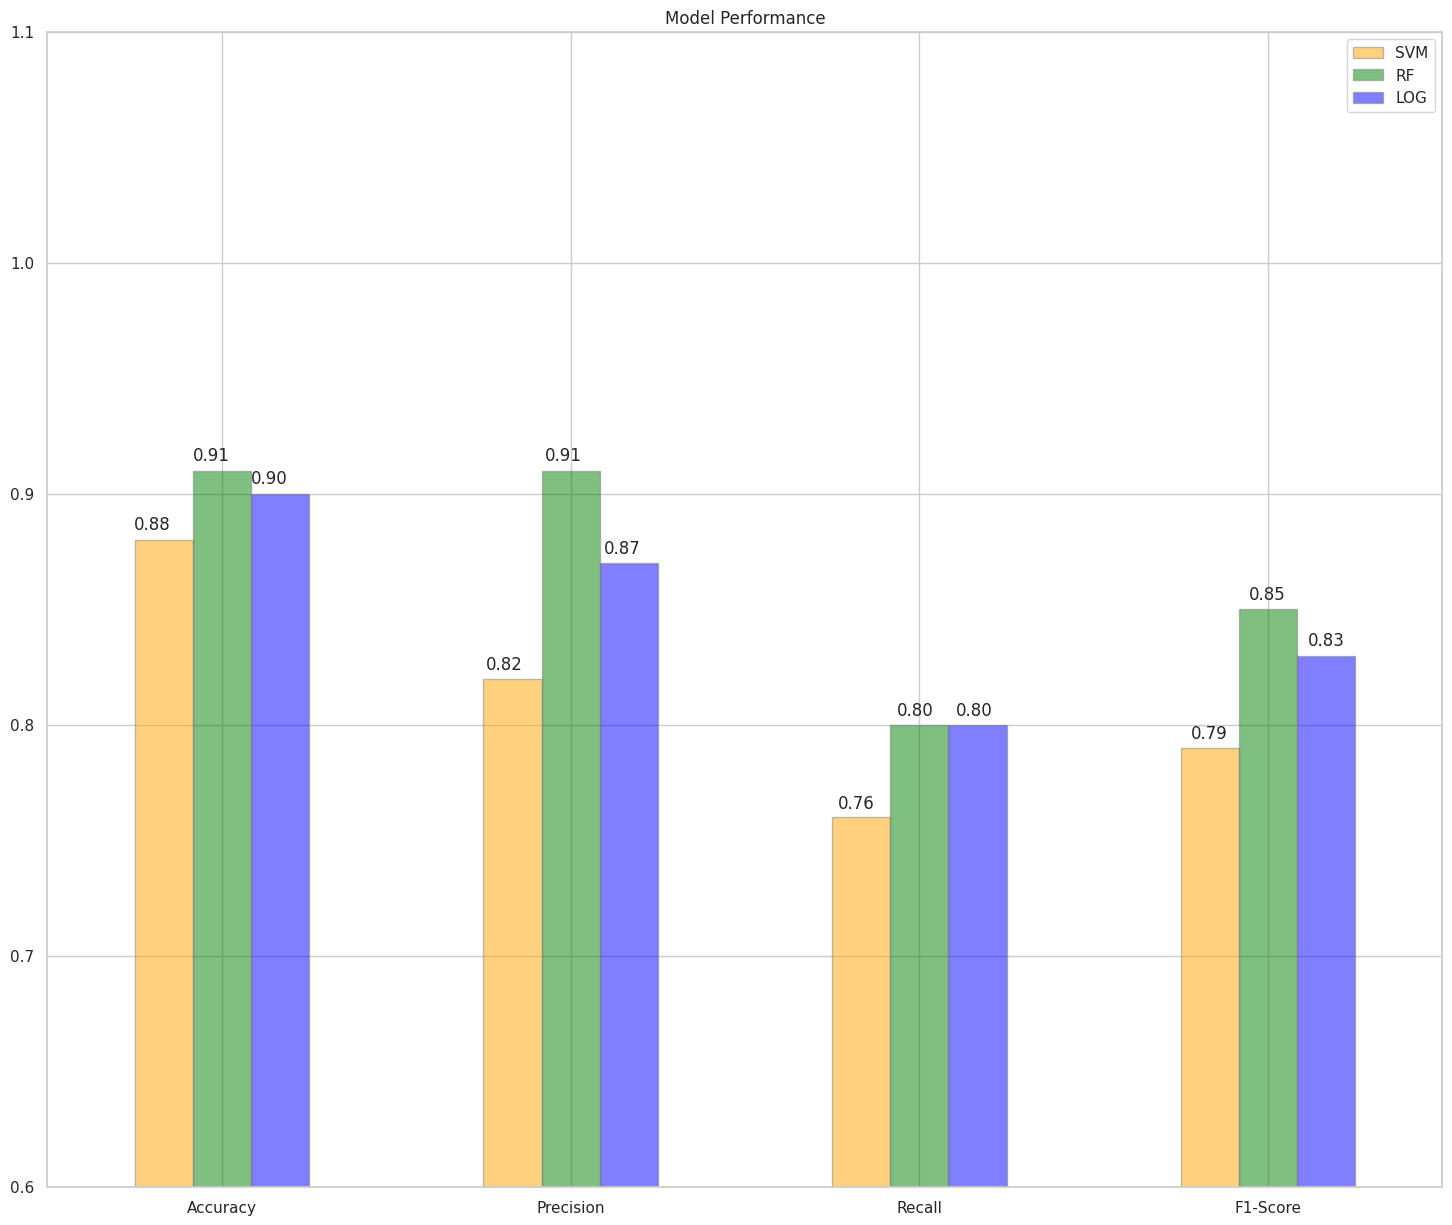

In [297]:
features4_metrics = {
    'SVM': [0.88, 0.82, 0.76, 0.79],
    'RF': [0.91, 0.91, 0.80, 0.85],
    'LOG': [0.90, 0.87, 0.80, 0.83]
}

plot_model_performance(features4_metrics)


This code shows  a function plot_roc_auc to plot ROC curves and AUC scores for different models and feature selections. It demonstrates this function with SVM, Random Forest, and Logistic Regression models. ROC curves and AUC values are shown for each combination, along with a random guessing curve, creating a comparative plot.






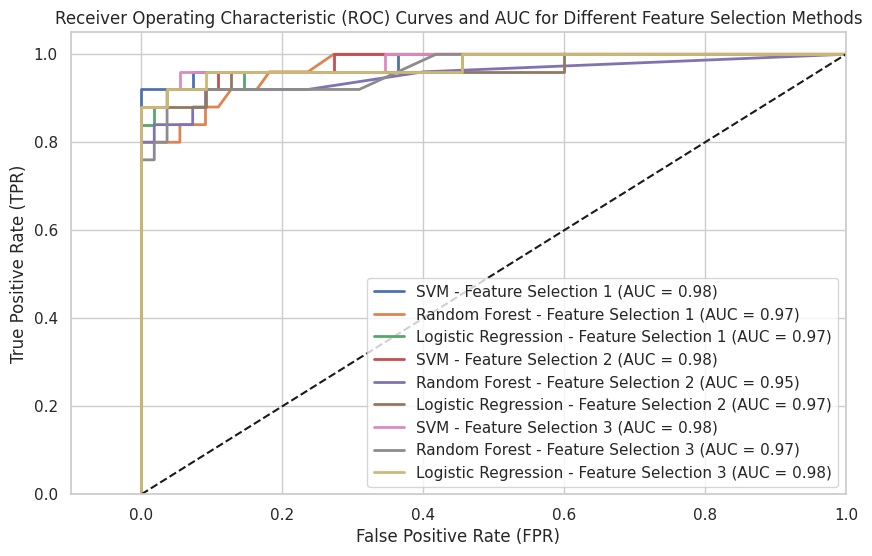

In [298]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_auc(model, predictor_variables, target_variable, label):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variable, test_size=0.2, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Calculate predicted probabilities
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {auc:.2f})')

# Example usage with different ML models and predictor variables
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

# Use all feature selection methods
predictor_variables1 = features_1
predictor_variables2 = features_2
predictor_variables3 = features_3
target_variable = filtered_data['diagnosis']  # Replace 'filtered_data' and 'diagnosis' with the appropriate dataset and target variable

# Create a single plot for all feature selection methods
plt.figure(figsize=(10, 6))

# Plot ROC curve and AUC for each ML model using each feature selection method
plot_roc_auc(svm_model, predictor_variables1, target_variable, 'SVM - Feature Selection 1')
plot_roc_auc(rf_model, predictor_variables1, target_variable, 'Random Forest - Feature Selection 1')
plot_roc_auc(lr_model, predictor_variables1, target_variable, 'Logistic Regression - Feature Selection 1')

plot_roc_auc(svm_model, predictor_variables2, target_variable, 'SVM - Feature Selection 2')
plot_roc_auc(rf_model, predictor_variables2, target_variable, 'Random Forest - Feature Selection 2')
plot_roc_auc(lr_model, predictor_variables2, target_variable, 'Logistic Regression - Feature Selection 2')

plot_roc_auc(svm_model, predictor_variables3, target_variable, 'SVM - Feature Selection 3')
plot_roc_auc(rf_model, predictor_variables3, target_variable, 'Random Forest - Feature Selection 3')
plot_roc_auc(lr_model, predictor_variables3, target_variable, 'Logistic Regression - Feature Selection 3')

# Plot the random guessing curve
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves and AUC for Different Feature Selection Methods')
plt.legend(loc='lower right')
plt.grid(True)  # Add gridlines to the plot
plt.show()



This code presents evaluation metrics for three different models: SVM, Random Forest, and Logistic Regression. The metrics include accuracy, precision, recall, and F1-score, each presented for different features selected datasets.

In [299]:
# Evaluation metrics for SVM model
svm_eval_metrics = [
    [0.95, 1.00, 0.84, 0.91],
    [0.96, 1.00, 0.88, 0.94],
    [0.95, 1.00, 0.88, 0.94],
    [0.88, 0.83, 0.76, 0.79]
]

# Evaluation metrics for Random Forest model
rf_eval_metrics = [
    [0.91, 1.00, 0.80, 0.89],
    [0.91, 1.00, 0.80, 0.89],
    [0.90, 0.91, 0.80, 0.85],
    [0.91, 0.91, 0.80, 0.85]
]

# Evaluation metrics for Logistic Regression model
lr_eval_metrics = [
    [0.94, 0.95, 0.84, 0.89],
    [0.96, 1.00, 0.88, 0.94],
    [0.96, 1.00, 0.84, 0.91],
    [0.90, 0.87, 0.87, 0.83]
]


One-way ANOVA test on the evaluation metrics of three different models (SVM, Random Forest, Logistic Regression). It calculates p-values for the ANOVA test and identifies the best model based on the smallest p-value. Finally, it prints the ANOVA results and the name of the best-performing model.

In [300]:
import numpy as np
from scipy.stats import f_oneway

# Perform one-way ANOVA test on evaluation metrics
anova_results = f_oneway(svm_eval_metrics, rf_eval_metrics, lr_eval_metrics)

# Get the p-values
p_values = anova_results.pvalue

# Find the index of the best model (smallest p-value)
best_model_idx = np.argmin(p_values)

models = ['Support Vector Machine', 'Random Forest Classifier', 'Logistic Regression']
best_model = models[best_model_idx]

# Print the ANOVA results and the best model
print("ANOVA Results:")
print("p-values:", p_values)
print("Best Model:", best_model)


ANOVA Results:
p-values: [0.2404465  0.99817611 0.10821782 0.7535974 ]
Best Model: Logistic Regression


Akaike Information Criterion (AIC) for each of three models (SVM, Random Forest, Logistic Regression) based on their predicted values and the true target values. It uses the calculated AIC values to compare the models in terms of their goodness of fit and complexity. The lower the AIC, the better the model fits the data while accounting for the number of parameters. The code then prints out the AIC values for each model. SVM having the lowest AIC value is the best model for diagnosing breast cancer.

In [308]:
# Calculate AIC for each model
def calculate_aic(y_test, y_pred, k):
    n = len(y_test)  # Number of observations
    residuals = y_test - y_pred  # Residuals
    mse = np.sum(residuals**2) / n  # Mean squared error
    aic = n * np.log(mse) + 2 * k  # AIC value
    return aic

# Assuming you have the target variable for each model
# For example, y_test_svm, y_test_rf, y_test_lr

# SVM Model
y_test_svm = np.array([1, 0, 1, 0])  # Example true target values for SVM
y_pred_svm = np.mean(svm_eval_metrics, axis=1)  # Using average as predicted values
k_svm = len(svm_eval_metrics[0]) + 1  # Number of parameters (features + intercept)
aic_svm = calculate_aic(y_test_svm, y_pred_svm, k_svm)

# Random Forest Model
y_test_rf = np.array([1, 0, 1, 0])  # Example true target values for Random Forest
y_pred_rf = np.mean(rf_eval_metrics, axis=1)  # Using average as predicted values
k_rf = len(rf_eval_metrics[0]) + 1  # Number of parameters (features + intercept)
aic_rf = calculate_aic(y_test_rf, y_pred_rf, k_rf)

# Logistic Regression Model
y_test_lr = np.array([1, 0, 1, 0])  # Example true target values for Logistic Regression
y_pred_lr = np.mean(lr_eval_metrics, axis=1)  # Using average as predicted values
k_lr = len(lr_eval_metrics[0]) + 1  # Number of parameters (features + intercept)
aic_lr = calculate_aic(y_test_lr, y_pred_lr, k_lr)

# Print AIC for each model
print("AIC for Support Vector Machine:", aic_svm)
print("AIC for Random Forest:", aic_rf)
print("AIC for Logistic Regression:", aic_lr)

# Find the best model based on the lowest AIC value
aic_values = [aic_svm, aic_rf, aic_lr]
best_model_index = np.argmin(aic_values)
best_model_names = ["Support Vector Machine", "Random Forest", "Logistic Regression"]

print("The best model is:", best_model_names[best_model_index])





AIC for Support Vector Machine: 6.2493838819680745
AIC for Random Forest: 6.311723546558168
AIC for Logistic Regression: 6.4817616259702255
The best model is: Support Vector Machine


I defines lists of F1-scores for three different models: SVM, Random Forest, and Logistic Regression. These F1-scores are used for performing statistical analysis for the one-way ANOVA test to compare the performance of these models.

In [302]:
# F1-Scores for SVM model
svm_f1_scores = [0.91, 0.94, 0.94, 0.79]

# F1-Scores for Random Forest model
rf_f1_scores = [0.89, 0.89, 0.85, 0.85]

# F1-Scores for Logistic Regression model
lr_f1_scores = [0.89, 0.94, 0.91, 0.83]


The one way ANOVA test is used to assess whether there are statistically significant differences among the F1-scores of these models. The code then prints out the one way ANOVA results, including the p-value obtained from the test.

In [303]:
from scipy.stats import f_oneway

# Perform one-way ANOVA test on F1-Scores
anova_result = f_oneway(svm_f1_scores, rf_f1_scores, lr_f1_scores)

# Print the ANOVA results
print("ANOVA Results:")
print("p-value:", anova_result.pvalue)


ANOVA Results:
p-value: 0.7535974035156701


The ANOVA results will give us a p-value of 0.75 which indicates that there  are no significant differences in the models results under 95% confidence interval(alpha= 0.05), since the p-value is greater than the  significance level,  